# IE 360 GROUP PROJECT


# 1-) INTRODUCTION

## A-) Problem Description

Solar power plants are a sustainable energy source, but their production can be unpredictable due to storage limitations and the inconsistency of sunlight throughout the day. To manage these challenges, it is essential to forecast the electricity output of solar plants over different time frames. Accurate predictions help mitigate the risks involved in trading and distributing solar energy. Factors such as weather variations, climate, and geographic location significantly influence solar energy production. In this project, the aim is to predict the hourly solar energy production of Edikli GES (Güneş Enerjisi Santrali) which is located in Niğde at 38.29 East (between 37.75-38.75° north latitude and 34.5-35.5° east longitude). The hourly predictions are made for the dates between May 13 and May 26. During the prediction phase, hourly solar energy production data is updated every day and a prediction is made for the next day using the most recent production data which is the production data from two days ago in this case. Further information related to the plant's capacity and location can be found on:

•https://www.birlesimyesilenerji.com/tr/yatirimlarimiz/edikli-ges 
•https://earth.google.com/web/search/Fevzipa%C5%9Fa,+Edikli+Ges+Enerji+A.%C5%9E.,+Edikli%2FNi%C4%9Fde+Merkez%2FNi%C4%9Fde/@38.28651617,34.96296291,1471.87322581a,2112.69733088d,35y,0h,0t,0r/data=CigiJgokCV9OHj-mJUNAEZb2MXWjI0NAGW9SZ_TTfUFAIYdh3Pm9eEFA

In addition to the production data, weather data for the 25 grid points near the power plant is provided. The weather data consists of 10 weather variables that are related to the production level. The weather variables are DSWRF_surface, USWRF_top_of_atmosphere, USWRF_surface, DLWRF_surface, TCDC_low.cloud.layer, TCDC_middle.cloud.layer, TCDC_high.cloud.layer, TCDC_entire.atmosphere, CSNOW_surface, and TMP_surface. Shortly, DSWRF_surface is the downward shortwave radiation flux and it is known to be highly related to the production level. USWRF_top_of_atmosphere, USWRF_surface and DLWRF_surface are solar radiation variables as well. TCDC_low.cloud.layer, TCDC_middle.cloud.layer, TCDC_high.cloud.layer, and TCDC_entire.atmosphere are the variables that show the total cloud cover of different types of clouds. CSNOW_surface is the categorical snow variable that indicates whether there is snow or not. In fact, a direct relationship can be established between this variable and production levels since when the solar panels get covered by snow, they can not produce energy. Lastly, TMP_surface is the variable that shows the temperature of a particular location. The use of the TMP_surface variable can introduce a seasonality variable in the prediction model. 
    As mentioned earlier, the weather information including the 10 weather variables is provided to us during the prediction phase for the specified 25 grid points around the plant. Unlike production data, the provided weather data includes the weather forecasts for one day ahead. By using the weather and production data that is updated every day, various models are built to forecast the solar energy production of Edikli GES. The performance of the models is compared in terms of weighted mean absolute percentage error since in the competition phase of the project, the WMAPE scores are evaluated. 

Various models are evaluated and compared based on their error rates. Ultimately, the model with the lowest error is recommended for predicting the target value.
    
## B-) Summary of the Proposed Approach

At the beginning, 25 coordinate data is reduced to each data by taking the mean of weather variables since there are too many weather data for each hour. If all the variables for each grid point (25 coordinates in total) are used, there would be lots of predictors/variables to add to models, representing weather information for that area. Therefore, it is thought that averaging could give us insight into the weather conditions of that region since the variables in those coordinates give close values to each other, and by using the averaged variables, the excess variables can be eliminated. For the CSNOW_surface variable, the max value among the 25 grid points is taken instead of taking the mean because it is a binary variable. After this reduction, a pre-processing process and data manipulation steps are conducted to obtain a stationary time series and to prepare the data for use in models. Without diving into details, the missing values and the zero production hours are removed from the data and 48 lag differencing is applied as the data manipulation. The removed zero production hours are the ones that have no production throughout the year. Moreover, separate daily production data is generated from the hourly production data. As the approach, the daily production sum is tried to be foreasted by using ARIMA and lineer regression models. Then hourly production amounts are predicted by using daily production sums and hourly ratios which are determined with lineer regression models trained on hourly production data. In linear regression models, the weather variables and seasonality variables are used while in the Arima models, autoregressive and moving average terms are used. After that, the performance of the models is examined. The WMAPE of the models including the merged regression models is compared and the model that gives the minimum WMAPE is chosen to be used in the forecast phase.

# 2-) RELATED LITERATURE

Forecasting solar power production is crucial for optimizing energy distribution and efficiency. We leveraged course notes, textbooks, and articles to build a robust model for solar energy prediction. Given that temperature, cloud conditions, relative humidity, and downward shortwave radiation flux (DSWRF) significantly impact solar panel efficiency, we applied a combination of linear regression and ARIMA models to account for these externalities and seasonal patterns.  According to research by the National Renewable Energy Laboratory (NREL), temperature variations significantly influence solar panel performance, with efficiency decreasing beyond certain temperature thresholds (NREL), this information is also supported by the Boston Solar Company. Additionally, studies by the International Journal of Energy Research highlight the importance of DSWRF and cloud cover in solar power generation. Utilizing resources such as DataCamp for coding and machine learning techniques further refined our predictive models. This comprehensive approach, informed by resources including DataCamp and various scholarly articles , ensures a detailed understanding and validation of the variables influencing solar energy production.

 ### Sources
* Boston Solar Company. "How Temperature Affects Solar Power Production." Boston Solar
* Ericson Gordo, Nashat Khalaf, and Tyler Strangeowl. "FACTORS AFFECTING SOLAR POWER PRODUCTION EFFICIENCY."
* National Renewable Energy Laboratory (NREL). "How Temperature Affects Solar Panel Efficiency." NREL
* International Journal of Energy Research. "Impact of Cloud Cover on Solar Power Production." Wiley Online Library
* International Journal of Energy Research. "The Role of Downward Shortwave Radiation Flux in Solar Power Generation." Wiley Online Library
* DataCamp. "Machine Learning Techniques for Solar Energy Forecasting." DataCamp

# 3-) APPROACH

## A-) Daily Production Forecasting

In this project, first daily production amount is forecasted, then this sum is distributed to each hour. The reason we start with daily production forecasting is hourly data have much more variance that is hard to capture and analyze. We can start by predicting daily production by reducing the variance and distribute this sum to hourly data in a more convenient way.

For daily production first ARIMA, then Lineer Regression models is used, their evaluation scores are observed.

### a-) ARIMA
The ARIMA model is a statistical model consisting of autoregressive and moving average terms. The "AR" stands for autoregressive terms, the "I" stands for integration part which is basically differencing to obtain stationary time series and the "MA" stands for moving average terms. Short explanations of these terms are provided below:

•AR - Autoregressive: Lagged values of the target variable, lagged observations

•I - Integrated: Differencing the time series to make it stationary

•MA - Moving Average: Lagged values of the residuals, lagged forecast errors

Briefly, the ARIMA model which is employed to make forecasts uses the previous values of observations and residual errors after making the time series stationary. In order to build an ARIMA model, three parameters which are p, d, and q need to be determined. The p is the number of autoregressive terms, the d is the number of non-seasonal differences and the q is the number of moving average terms. The ARIMA models can be shown as ARIMA(p,d,q) with parameters p, d, and q mentioned above.

In this project, the ARIMA model approach is used to see whether it works better as an alternative model or not. Additionally, it is intended to be used to see whether combining the ARIMA model with hourly linear regression models would yield good results. ****

Before building an ARIMA model, the hourly production data is converted into daily production data to catch information easily from the data. To put it another way, the first pre-processing step is conducted by aggregating the data on a daily basis. After that, the daily production data is plotted to examine the data characteristics.

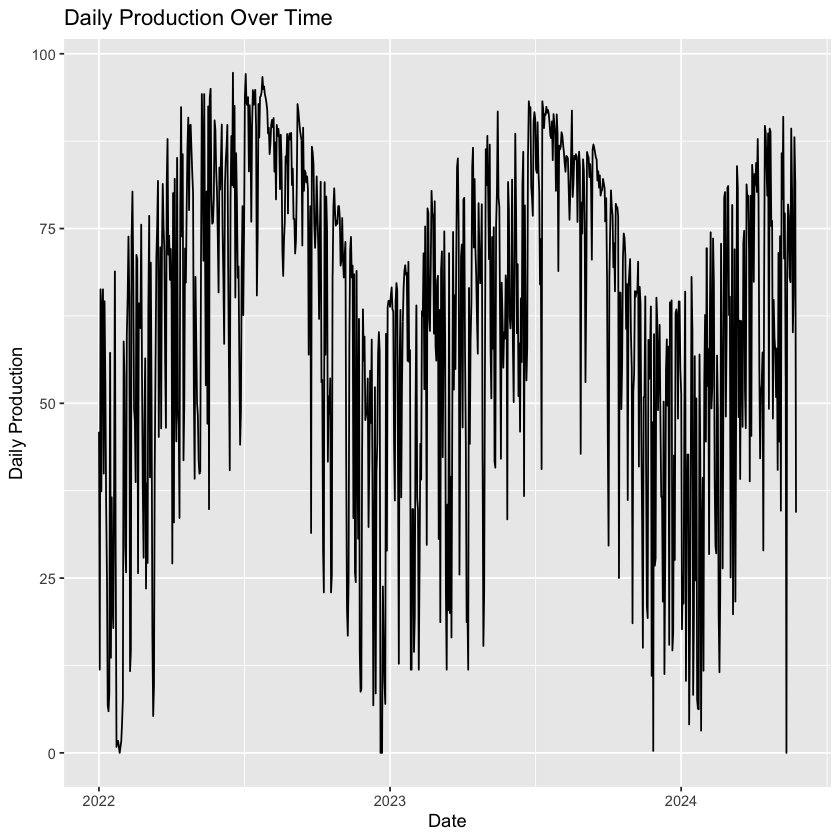

In [46]:
###IMPORT THE REQUIRED LIBRARIES
library(readxl)
library(dplyr)
library(ggplot2)
library(urca)
library(forecast)
library(gridExtra)
require(data.table)
require(lubridate)
require(forecast)
require(skimr)
require(repr)
require(zoo)
require(GGally)
require(tseries)
library(caret)
library(rpart)
library(rattle)

production <- read_excel("~/Downloads/production-13.xlsx")
production=data.table(production)


###CONVERT HOURLY DATA TO DAILY DATA
daily_production <- production %>%
  group_by(date) %>%
  summarize(daily_production = sum(production))

daily_production_data = daily_production$daily_production
daily_production$date = as.Date(daily_production$date)
ggplot(daily_production, aes(x = date, y = daily_production_data)) +
  geom_line() + 
  labs(title = "Daily Production Over Time", x = "Date", y = "Daily Production")


When the daily production plot is examined, it is observed that the daily production data is not a stationary time series because its mean and variance change over time. Besides, the plot shows that there is a seasonality effect on the data. To support the visual interpretations from the plot, the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test which is a stationarity test is performed.

In [47]:
###RUN KPSS TESST FOR DIFFERENCING
daily_production$daily_production %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 6 lags. 

Value of test-statistic is: 0.4665 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


After the KPSS Unit Root Test, it is found that the daily production time series is not stationary since the value of test-statictic found is higher than the first two critical values. To make this time series stationary and reduce the variance, the differencing method is applied. 
One of the most important reasons why it is decided to apply differencing is that we don't have the production data for the day before the day to be predicted during the submission phase. Thus, we can not use the lag 1 terms in the ARIMA model. Based on this fact, 2 lag differencing is applied to the daily production data. The first two data in the differenced time series, which have a value of NA, are removed from the data. Then, the KPSS Unit Root Test is repeated for the 2 lag differenced data.


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 6 lags. 

Value of test-statistic is: 0.0145 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


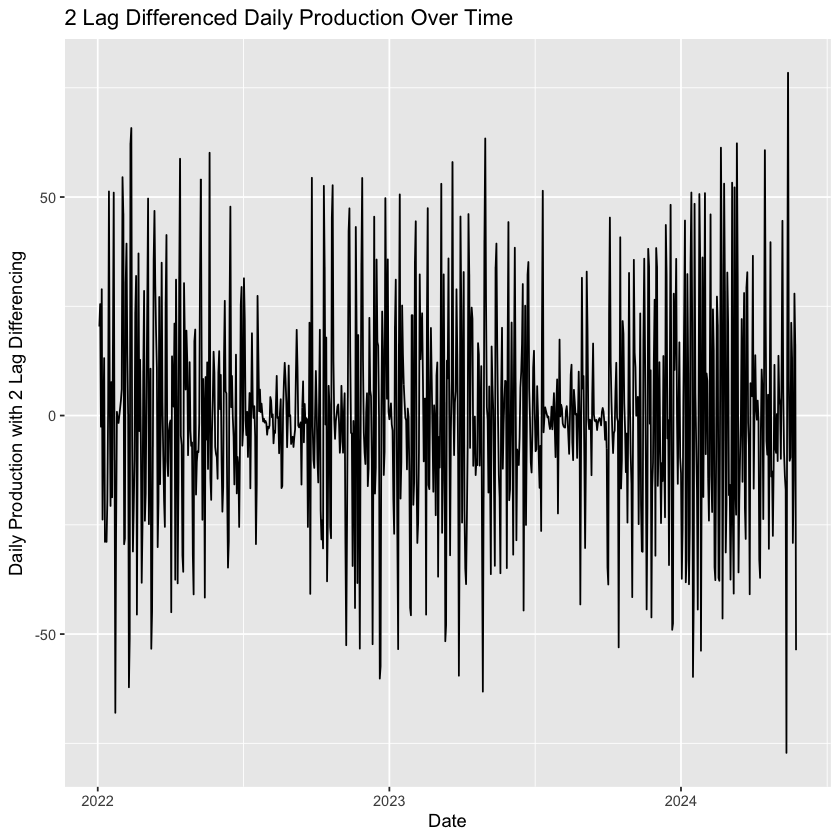

In [48]:
###APPLY DIFFERENCING
daily_production$daily_production_lag_2_diff<- c(rep(NA,2),diff(daily_production$daily_production,lag=2))
date_vector = daily_production$date
daily_production_diff_2 = daily_production$daily_production_lag_2_diff %>% na.omit()

df_daily_prod <- daily_production[, c("date", "daily_production")] 

df_daily_prod_diff <- daily_production[, c("date", "daily_production_lag_2_diff")] 
df_daily_prod_diff <- na.omit(df_daily_prod_diff)
daily_production$daily_production_lag_2_diff %>% ur.kpss() %>% summary()
ggplot(df_daily_prod_diff, aes(x = date, y = daily_production_diff_2)) +
  geom_line() + 
  labs(title = "2 Lag Differenced Daily Production Over Time", x = "Date", y = "Daily Production with 2 Lag Differencing")

After 2 lag differencing and the KPSS test, a stationary time series is obtained based on the test results since the value of test statistic is much lower than the critical values. Other than that, from the 2 lag differenced daily production plot, it is seen that the time series has less variance and a constant mean. Additionally, the seasonality effect seems to be disappeared in the new time series. As a result, by applying 2 lag differencing, we managed to have a stationary time series and a feasible setting for the ARIMA predictions.

After the differencing, the ACF (Autocorrelation function) and PACF (Partial autocorrelation function) plots of the differenced daily production data are inspected to determine the parameters of the ARIMA model.

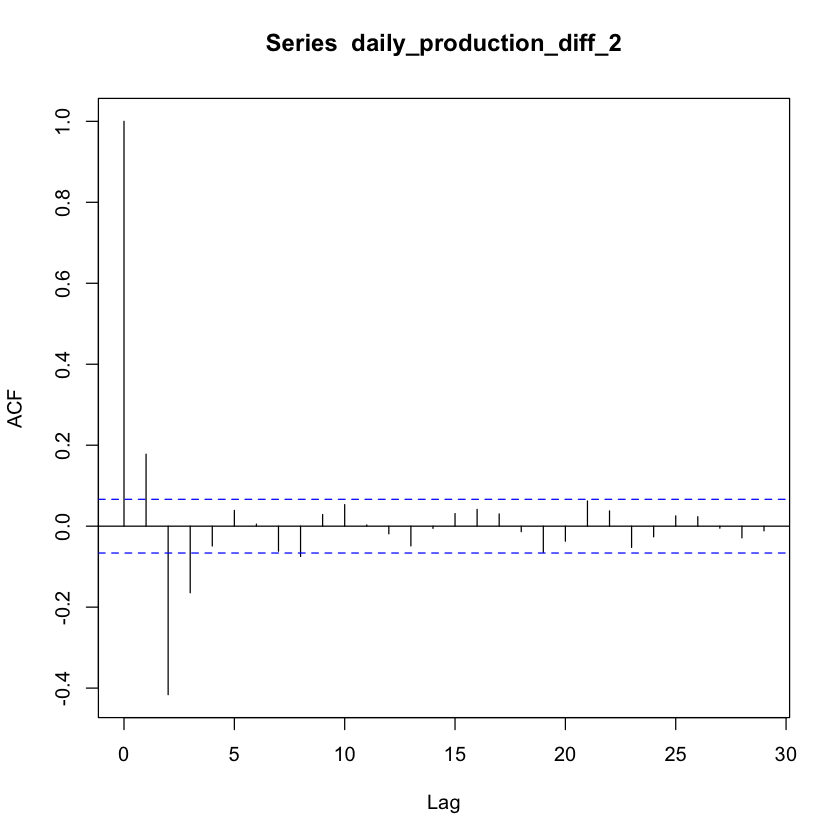

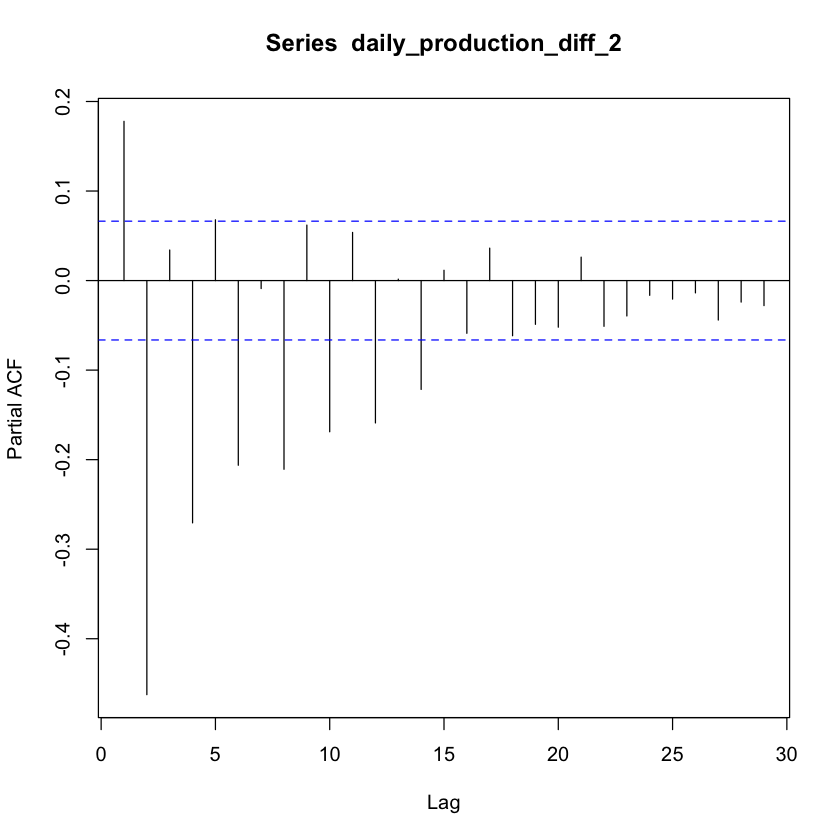

In [49]:
###ARIMA
#Checking ACF and PACF
acf(daily_production_diff_2)
pacf(daily_production_diff_2)

When the ACF and PACF plots are examined, it is observed that PACF is exponentially decaying and there is a significant spike at lag 1 and 3 in the ACF. Thus, ARIMA(0,0,3) model is considered. In addition to customly fitted ARIMA model, an ARIMA model is obtained by using auto.arima function in R. 

Series: daily_production_diff_2 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
         ma1      ma2      ma3    mean
      0.3959  -0.8557  -0.2516  0.0604
s.e.  0.0314   0.0266   0.0324  0.1728

sigma^2 = 309.2:  log likelihood = -3743.33
AIC=7496.65   AICc=7496.72   BIC=7520.51

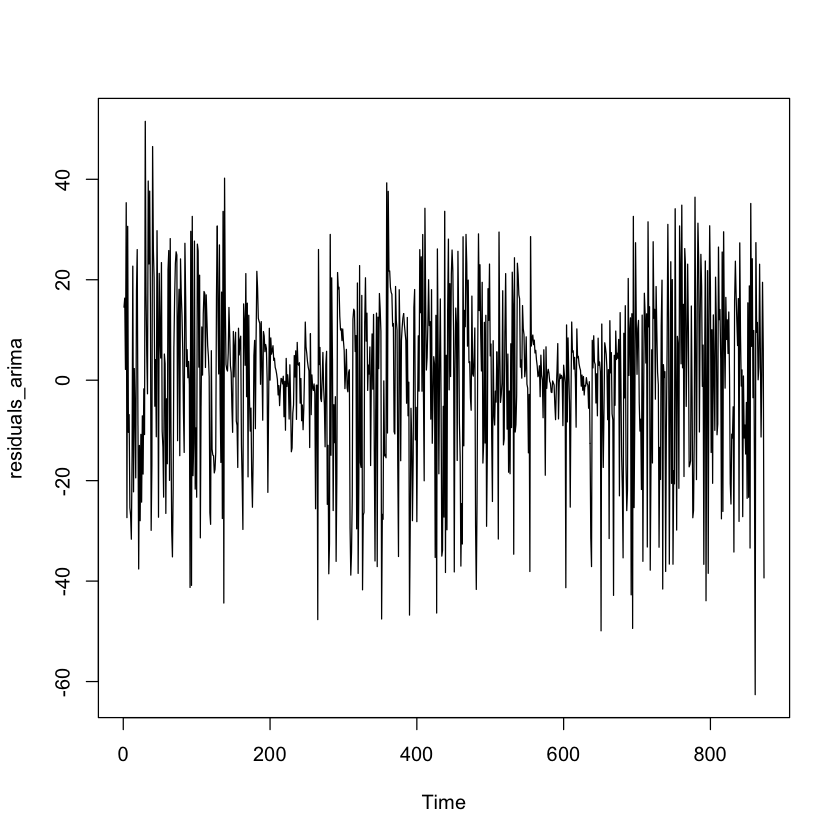

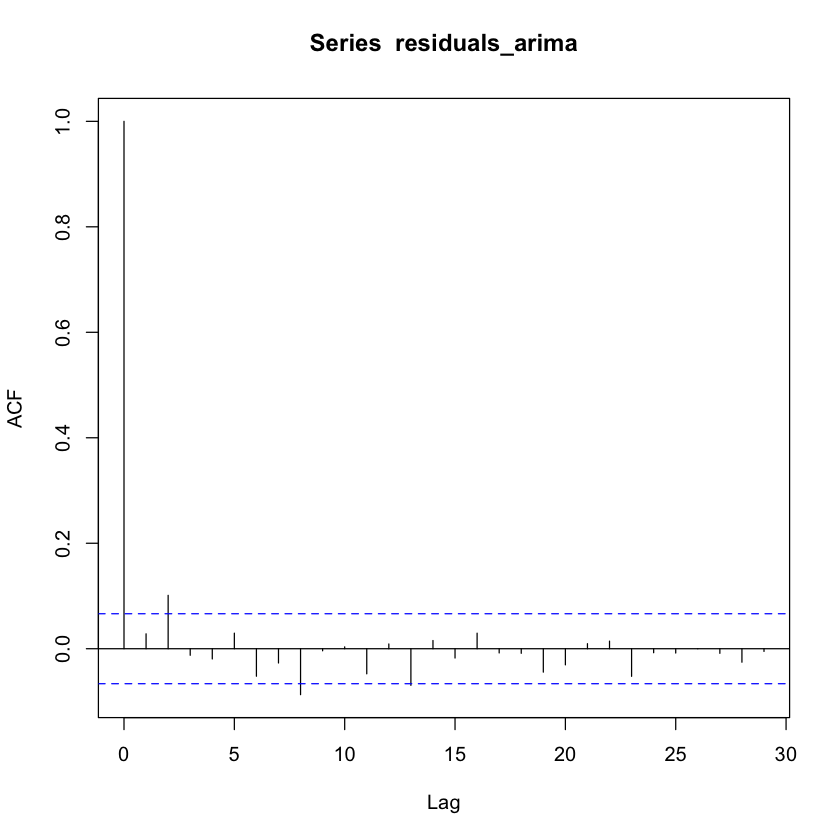

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-62.61013 -10.13389   1.85042   0.00669  11.50366  51.53934 

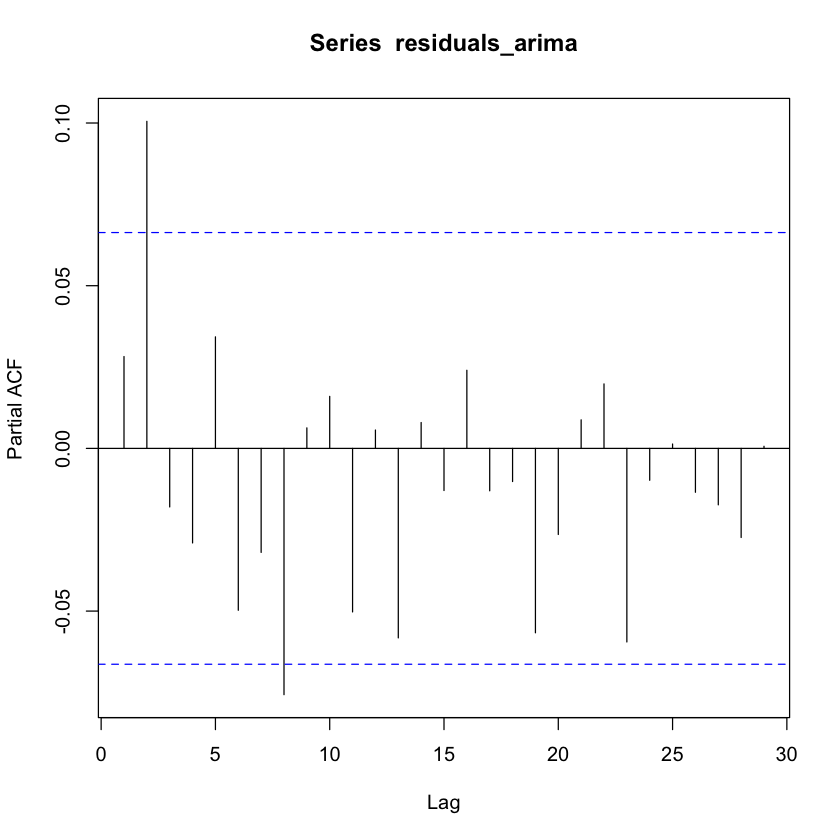

In [50]:
###CUSTOMLY FITTED ARIMA MODEL
arima_model <- Arima(daily_production_diff_2, order=c(0,0,3))
arima_model
residuals_arima =residuals(arima_model)
plot(residuals_arima)
acf(residuals_arima)
pacf(residuals_arima)
summary(residuals_arima)

Series: df_daily_prod_diff$daily_production_lag_2_diff 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.1789  0.0587
s.e.  0.0334  0.9482

sigma^2 = 530.7:  log likelihood = -3976.45
AIC=7958.9   AICc=7958.93   BIC=7973.22

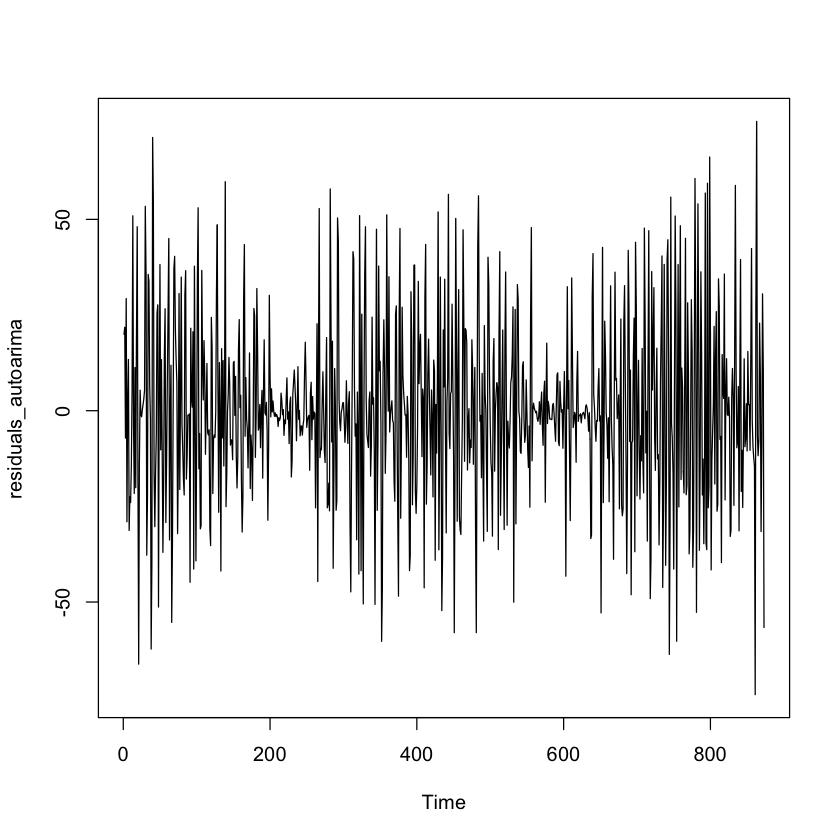

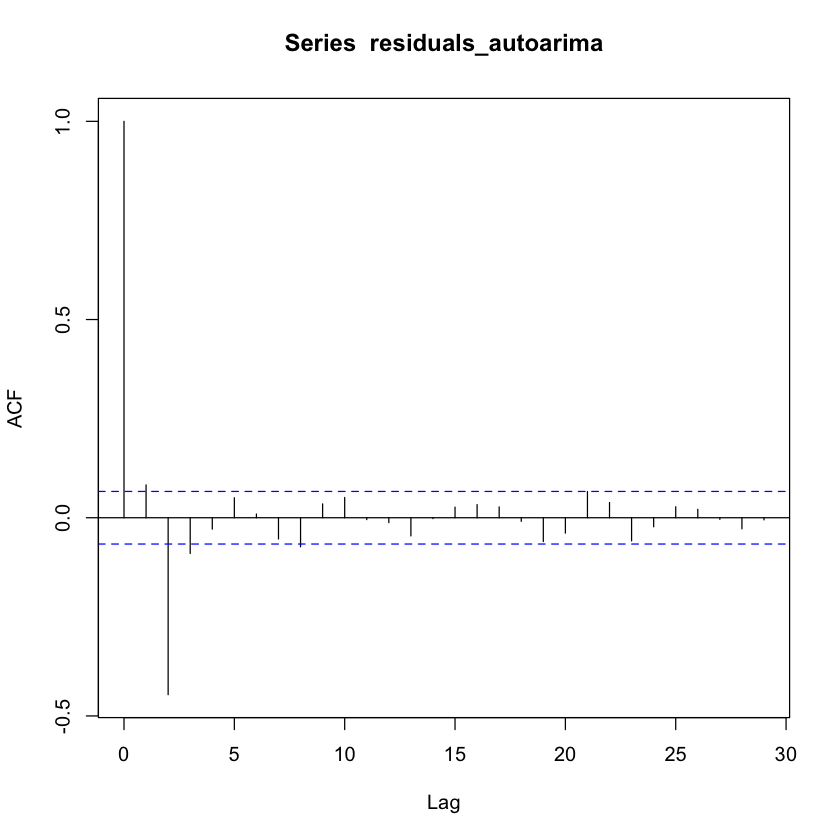

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-74.20702 -12.32954  -1.05020  -0.00452  11.25132  75.62006 

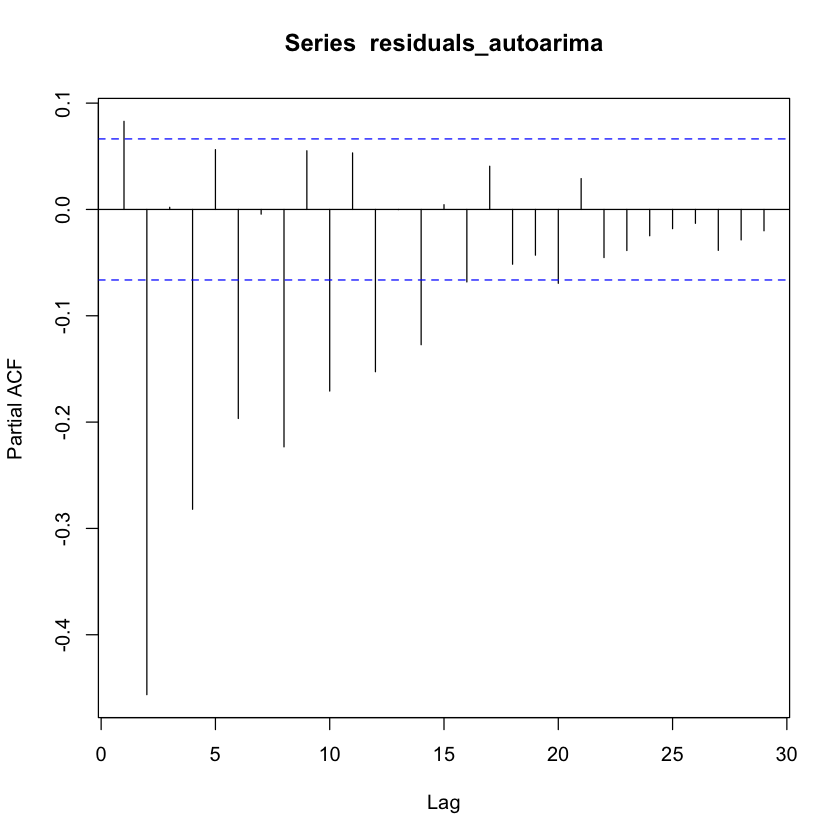

In [51]:
###AUTOARIMA MODEL
autoarima_model = auto.arima(df_daily_prod_diff$daily_production_lag_2_diff)
autoarima_model
residuals_autoarima =residuals(autoarima_model)
plot(residuals_autoarima)
acf(residuals_autoarima)
pacf(residuals_autoarima)
summary(residuals_autoarima)

The auto.arima function generated an ARIMA(1,0,0) model for the differenced data. When the performance of these ARIMA models are compared, it is seen that the BIC value of the ARIMA(0,0,3) is lower than the BIC value of the ARIMA(1,0,0) which indicates the ARIMA(0,0,3) is better than the ARIMA(1,0,0). As the second comparison metric, the residuals of the models are evaluated. By looking on the residuals and the ACF, PACF plots of the residuals, it is observed that partial autocorrelations of the ARIMA (1,0,0) model's residuals are high up to 14th lag, which indicates that there is still information on the residuals that can be extracted. Thus, the result of the second comparison gives the same result as the results of first comparison. When the residuals of ARIMA(0,0,3) are examined, it is found that there is no significant relationship between the residuals and their lagged values, and the residuals behave like white noise, there is no specific pattern as well. Based on these findings, it is concluded that the ARIMA model which is customly fitted performs better than the model generated by the auto.arima function. Therefore, the ARIMA(0,0,3) model is selected for the forecasting with ARIMA.

### b-) Linear Regression
Linear regression is a method used to understand and measure the relationship between one main variable and one or more other variables. It works by finding a straight line that best fits the data points, showing the trend in the data. The main goal is to see how changes in the other variables affect the main variable, giving us a clear picture of their connections. This technique helps in making predictions and understanding patterns within the data.

First, we import and manipulate the data sets for a convenient use.

In [82]:
###IMPORTING THE DATA
weather_data <- read_excel("~/Downloads/processed_weather-12.xlsx")
weather_data <- data.table::as.data.table(weather_data)

prod_data <- read_excel("~/Downloads/production-13.xlsx")
prod_data <- data.table::as.data.table(prod_data)

colnames(weather_data) <- c("date", "hour", "lat", "lon", "dswrf_surface", "tcdc_low", "tcdc_middle", "tcdc_high", "tcdc_entire", "uswrf_atm", "csnow", "dlwrf_surface", "uswrf_surface", "tmp_surface")
weather_data$date <- as.Date(weather_data$date)

colnames(prod_data) <- c("date", "hour", "production")
prod_data$date <- as.Date(prod_data$date)

setorder(weather_data, date, hour)
setorder(prod_data, date, hour)

head(weather_data)
str(weather_data)

head(prod_data)
str(prod_data)

date       hour lat   lon   dswrf_surface tcdc_low tcdc_middle tcdc_high
1 2022-01-01 4    38.00 35.00 0             0.2       5.0        2.1      
2 2022-01-01 4    38.50 35.25 0             1.6       0.0        1.6      
3 2022-01-01 4    37.75 34.75 0             4.4      21.8        6.9      
4 2022-01-01 4    38.75 34.50 0             5.0       0.0        5.0      
5 2022-01-01 4    37.75 34.50 0             0.0      36.1        5.8      
6 2022-01-01 4    38.25 34.75 0             0.0       0.0        7.5      
  tcdc_entire uswrf_atm csnow dlwrf_surface uswrf_surface tmp_surface
1  8.2        0         0     219.279       0             268.804    
2  3.3        0         0     227.479       0             271.204    
3 32.7        0         0     227.179       0             268.304    
4 14.7        0         0     241.779       0             271.404    
5 41.4        0         0     241.879       0             272.504    
6  9.1        0         0     230.579       0             271.204

Classes ‘data.table’ and 'data.frame':	527850 obs. of  14 variables:
 $ date         : Date, format: "2022-01-01" "2022-01-01" ...
 $ hour         : num  4 4 4 4 4 4 4 4 4 4 ...
 $ lat          : num  38 38.5 37.8 38.8 37.8 ...
 $ lon          : num  35 35.2 34.8 34.5 34.5 ...
 $ dswrf_surface: num  0 0 0 0 0 0 0 0 0 0 ...
 $ tcdc_low     : num  0.2 1.6 4.4 5 0 0 5 1.7 5 1.7 ...
 $ tcdc_middle  : num  5 0 21.8 0 36.1 0 0.9 0 0 25.1 ...
 $ tcdc_high    : num  2.1 1.6 6.9 5 5.8 7.5 9.7 5 5 5 ...
 $ tcdc_entire  : num  8.2 3.3 32.7 14.7 41.4 9.1 18.3 8.8 13.2 32.3 ...
 $ uswrf_atm    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ csnow        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dlwrf_surface: num  219 227 227 242 242 ...
 $ uswrf_surface: num  0 0 0 0 0 0 0 0 0 0 ...
 $ tmp_surface  : num  269 271 268 271 273 ...
 - attr(*, ".internal.selfref")=<externalptr> 


date       hour production
1 2022-01-01 0    0         
2 2022-01-01 1    0         
3 2022-01-01 2    0         
4 2022-01-01 3    0         
5 2022-01-01 4    0         
6 2022-01-01 5    0

Classes ‘data.table’ and 'data.frame':	21000 obs. of  3 variables:
 $ date      : Date, format: "2022-01-01" "2022-01-01" ...
 $ hour      : num  0 1 2 3 4 5 6 7 8 9 ...
 $ production: num  0 0 0 0 0 0 0 0 3.4 6.8 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Then we take the means of the variables in data sets and max for the CSNOW variable since it is a categorical variable.

In [83]:
###MERGING 25 COORDINATES
aggregated_data <- weather_data[, .(
  dswrf_surface = mean(dswrf_surface),
  uswrf_atm = mean(uswrf_atm),
  uswrf_surface = mean(uswrf_surface),
  dlwrf_surface = mean(dlwrf_surface),
  tmp_surface = mean(tmp_surface),
  tcdc_low = mean(tcdc_low),
  tcdc_middle = mean(tcdc_middle),
  tcdc_high = mean(tcdc_high),
  tcdc_entire = mean(tcdc_entire),
  csnow = max(csnow)    
), by = .(date,hour)]

final_weather_data <- aggregated_data
final_data_ <- final_weather_data[prod_data, on = .(date,hour)]
final_data_ <- merge(final_weather_data, prod_data, by = c("date","hour"), all.x = TRUE)

head(final_data_)
str(final_data_)

date       hour dswrf_surface uswrf_atm uswrf_surface dlwrf_surface
1 2022-01-01 4    0.0000        0.00000   0.0000        227.999      
2 2022-01-01 5    0.0000        0.00000   0.0000        227.774      
3 2022-01-01 6    0.0000        0.00000   0.0000        227.764      
4 2022-01-01 7    0.0000        0.00000   0.0000        228.196      
5 2022-01-01 8    0.0000        0.00000   0.0000        228.657      
6 2022-01-01 9    7.3688        8.96704   2.4128        229.416      
  tmp_surface tcdc_low tcdc_middle tcdc_high tcdc_entire csnow production
1 269.220     2.384     5.944       4.604    14.296      0     0.0       
2 269.104     2.784     4.324      10.636    19.272      0     0.0       
3 269.035     2.964     5.372      11.688    21.772      0     0.0       
4 269.001     3.284     9.212      20.736    31.992      0     0.0       
5 269.002     3.672    11.252      26.432    38.376      0     3.4       
6 271.634     4.120    10.880      35.088    45.856      0     6.8

Classes ‘data.table’ and 'data.frame':	21114 obs. of  13 variables:
 $ date         : Date, format: "2022-01-01" "2022-01-01" ...
 $ hour         : num  4 5 6 7 8 9 10 11 12 13 ...
 $ dswrf_surface: num  0 0 0 0 0 ...
 $ uswrf_atm    : num  0 0 0 0 0 ...
 $ uswrf_surface: num  0 0 0 0 0 ...
 $ dlwrf_surface: num  228 228 228 228 229 ...
 $ tmp_surface  : num  269 269 269 269 269 ...
 $ tcdc_low     : num  2.38 2.78 2.96 3.28 3.67 ...
 $ tcdc_middle  : num  5.94 4.32 5.37 9.21 11.25 ...
 $ tcdc_high    : num  4.6 10.6 11.7 20.7 26.4 ...
 $ tcdc_entire  : num  14.3 19.3 21.8 32 38.4 ...
 $ csnow        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ production   : num  0 0 0 0 3.4 6.8 9.38 7.65 6.8 5.1 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr [1:2] "date" "hour"


We clean the empty data rows and zero production hours because the model will not benefit from the zero production hours. Those hours are the ones that have no production throughout the year.

In [84]:
###CLEANING DATA
final_data_[,mon:=as.character(month(date,label=T))]
final_data_[, lag_48 := shift(production, 48)]
final_data_[, hour := factor(hour)]
final_data_ <- na.omit(final_data_)
final_data_ <- final_data_[complete.cases(final_data_), ]
zero_hours <- c(0,1,2,3,4,19,20,21,22,23)
nonzero_production <- final_data_[hour %in% zero_hours & production != 0]
final_data <- final_data_[!(hour %in% zero_hours)]
head(final_data_)

date       hour dswrf_surface uswrf_atm uswrf_surface dlwrf_surface
1 2022-01-03 4    0.0000        0.00000   0.00000       198.1770     
2 2022-01-03 5    0.0000        0.00000   0.00000       198.2010     
3 2022-01-03 6    0.0000        0.00000   0.00000       198.5360     
4 2022-01-03 7    0.0000        0.00000   0.00000       199.0334     
5 2022-01-03 8    0.0000        0.00000   0.00000       199.4730     
6 2022-01-03 9    8.5648        7.75168   3.31648       200.0130     
  tmp_surface tcdc_low tcdc_middle tcdc_high tcdc_entire csnow production mon
1 266.460     11.260   0           0.544     12.448      0     0.00       Jan
2 266.297      9.660   0           0.276     10.492      0     0.00       Jan
3 266.189      9.296   0           0.284     10.084      0     0.00       Jan
4 266.118      8.484   0           0.208      9.196      0     0.85       Jan
5 265.995      7.988   0           0.180      8.608      0     5.10       Jan
6 268.494      7.800   0           0.180      8.404      0     9.35       Jan
  lag_48
1 0.0   
2 0.0   
3 0.0   
4 0.0   
5 3.4   
6 6.8

We create daily production and weather data set.

In [112]:
###CREATING DAILY DATA
daily_data <- final_data[, .(
  avg_dswrf_surface = mean(dswrf_surface),
  avg_tcdc_low = mean(tcdc_low),
  avg_tcdc_middle = mean(tcdc_middle),
  avg_tcdc_high = mean(tcdc_high),
  avg_tcdc_entire = mean(tcdc_entire),
  avg_uswrf_atm = mean(uswrf_atm),
  avg_csnow = mean(csnow),
  avg_dlwrf_surface = mean(dlwrf_surface),
  avg_uswrf_surface = mean(uswrf_surface),
  avg_tmp_surface = mean(tmp_surface),
  mon = unique(mon),
  production_daily = sum(production)
), by = date]

daily_data$daily_production_lag_2_diff<- c(rep(NA,2),diff(daily_data$production_daily,lag=2))
daily_production_diff_2 = daily_data$daily_production_lag_2_diff %>% na.omit()

Now we start with daily production model. Plotting the predictors pairwise will be the first step.

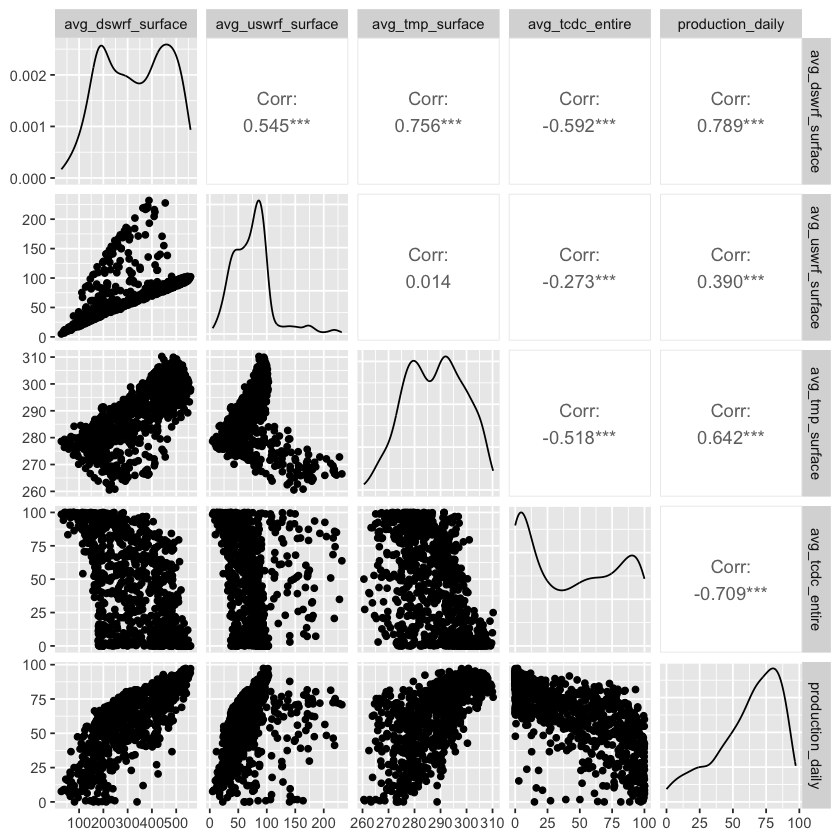

In [113]:
###PLOTTING THE PAIRVISE PLOTS AND CORRELATIONS
ggpairs(daily_data, columns= c("avg_dswrf_surface", "avg_uswrf_surface", "avg_tmp_surface", "avg_tcdc_entire", "production_daily"))

We create a linear model that takes the regressors that seems most promising in the ggpairs output. Then to check its validity we analyze and store the residuals.

In [114]:
###FITTING LINEER REGRESSION MODEL FOR DAILY PRODUCTION
lm_daily <- lm(production_daily ~ avg_dswrf_surface + avg_tmp_surface + avg_tcdc_entire + avg_tcdc_low + avg_csnow + mon + avg_tcdc_low*mon + avg_dswrf_surface*avg_tcdc_low + avg_tmp_surface*avg_tcdc_entire + avg_tmp_surface*avg_dswrf_surface + avg_csnow*avg_dswrf_surface + avg_dswrf_surface*mon + avg_tmp_surface*mon + avg_tcdc_entire*mon + avg_dswrf_surface*avg_tcdc_entire*mon, daily_data)
summary(lm_daily)


Call:
lm(formula = production_daily ~ avg_dswrf_surface + avg_tmp_surface + 
    avg_tcdc_entire + avg_tcdc_low + avg_csnow + mon + avg_tcdc_low * 
    mon + avg_dswrf_surface * avg_tcdc_low + avg_tmp_surface * 
    avg_tcdc_entire + avg_tmp_surface * avg_dswrf_surface + avg_csnow * 
    avg_dswrf_surface + avg_dswrf_surface * mon + avg_tmp_surface * 
    mon + avg_tcdc_entire * mon + avg_dswrf_surface * avg_tcdc_entire * 
    mon, data = daily_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.808  -4.454   0.878   5.587  32.110 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -7.514e+02  3.886e+02  -1.934 0.053522
avg_dswrf_surface                         1.417e+00  7.668e-01   1.848 0.064966
avg_tmp_surface                           2.702e+00  1.336e+00   2.022 0.043504
avg_tcdc_entire                           9.590e-01  1.419e+00   0.676 0.499420
avg_tcdc_low                       


	Breusch-Godfrey test for serial correlation of order up to 80

data:  Residuals
LM test = 95.773, df = 80, p-value = 0.1102


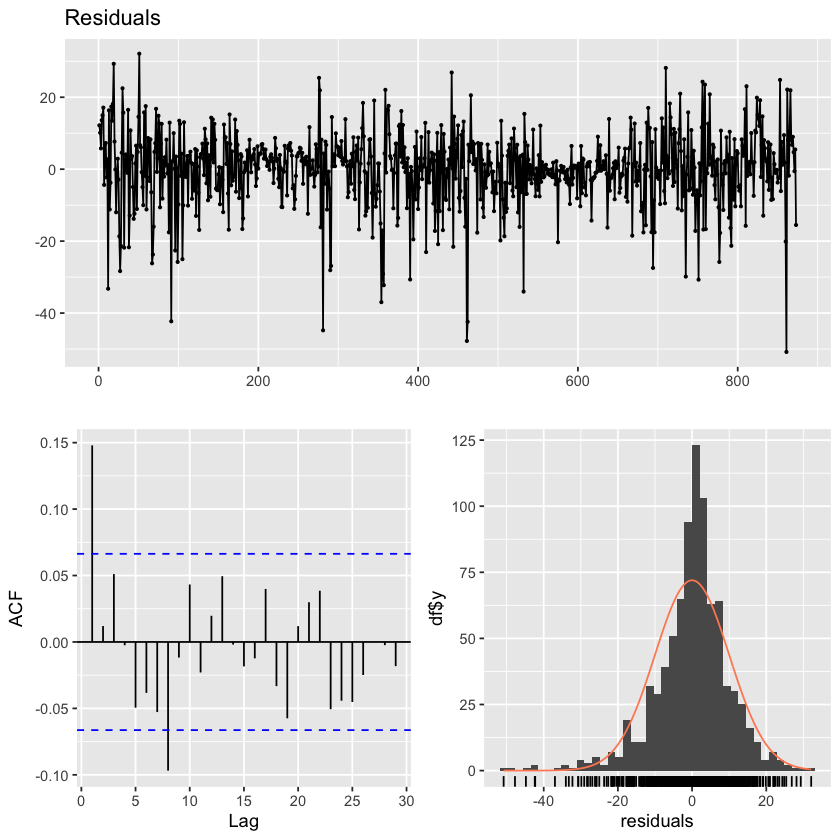

In [115]:
###PLOT AND STORE THE RESIDUALS
checkresiduals(lm_daily)

rm(tmp_daily)
tmp_daily=copy(daily_data)
tmp_daily[,actual_daily:=production_daily]
tmp_daily[,predicted_daily:=predict(lm_daily,tmp_daily)]
tmp_daily[,residual_daily:=actual_daily-predicted_daily]

Here are the plot of the predicted and actual data points.

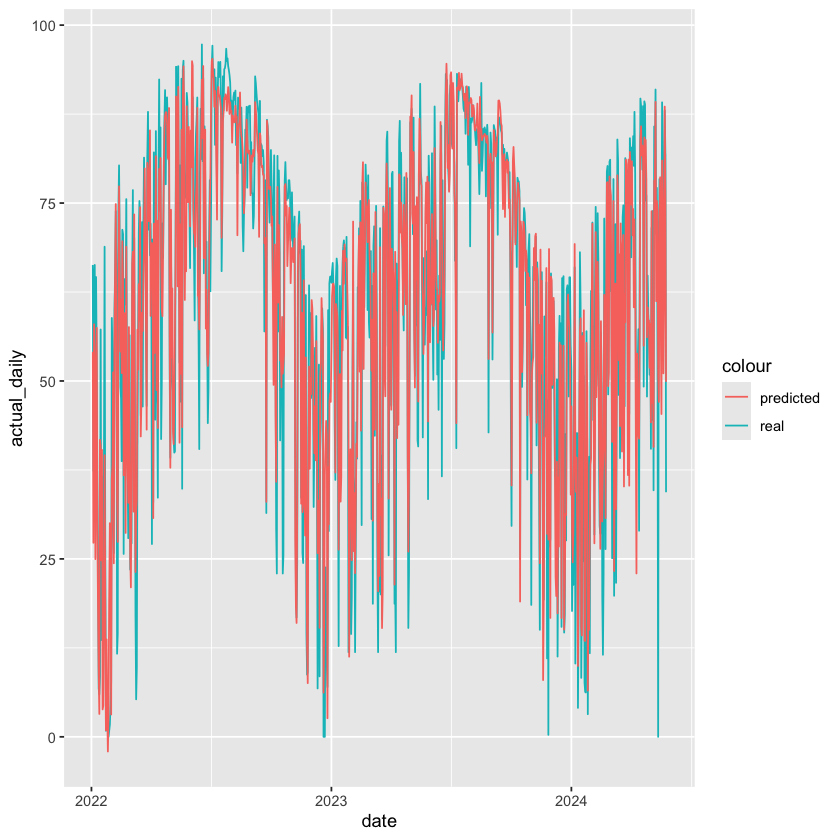

In [116]:
###PLOT THE ACTUAL AND PREDICTED VALUES
ggplot(tmp_daily ,aes(x=date)) +
        geom_line(aes(y=actual_daily,color='real')) + 
        geom_line(aes(y=predicted_daily,color='predicted'))

Decision tree analysis is performed on those residuals. Decision tree analysis on a linear model integrates decision trees with linear regression. It works by dividing the data into various segments using a decision tree based on input feature values. In each segment, a linear regression model is employed for predictions. This method captures non-linear patterns via the tree and linear relationships within segments, enhancing prediction accuracy and interpretability.

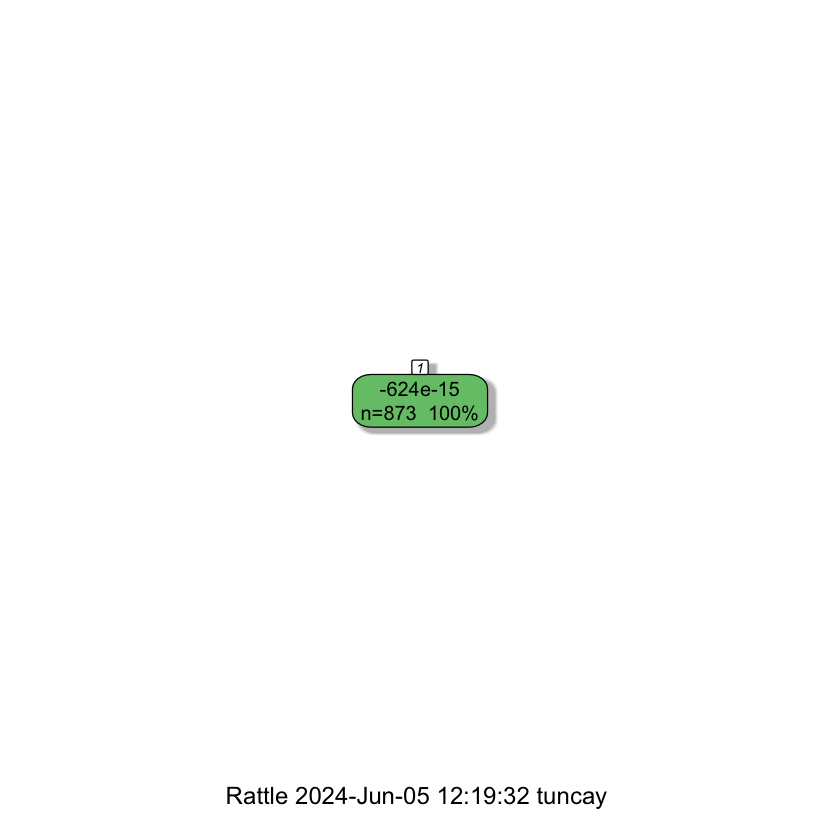

In [117]:
###RUN DECISION TREE ANALYSIS
model <- rpart(
  residual_daily ~ avg_dswrf_surface + avg_tmp_surface + avg_tcdc_entire + avg_tcdc_low + avg_csnow + mon,
  data = tmp_daily,
  method = "anova"
)
fancyRpartPlot(model)

### c-) Evaluation for Daily Production Forecasting

In the evaluation part, firstly, the data is divided into two separate data, one to be used for training the models and one to be used for testing the daily models. To divide the data into train data and test data, it is decided to employ 80% training and 20% test method which is commonly used method in splitting data into train and test data. In other words, the first 80% of the data is used to train the model and the remaining 20% of the data is used to test the model. After that, the ARIMA prediction and the linear regression model prediction for each day in the test dates/data is made. Once the predictions are finished, to predict the real value of production, each ARIMA prediction for differenced time series (arima_prediction_diff) is summed with the daily production value of two days before the corresponding ARIMA prediction day. However, for the regression model predictions, this step is not conducted since no differencing is applied in the linear regression approach.

In [132]:
###FORECAST AND EVALUATION OF DAILY MODELS
###TRAIN TEST SPLIT
total_length <- length(daily_production_diff_2)
train_length <- floor(0.8 * total_length)
test_length <- total_length - train_length

train_data <- daily_production_diff_2[1:train_length]
test_data <- daily_production_diff_2[(train_length+1):total_length]
test_start= df_daily_prod_diff$date[train_length+1]
test_end = df_daily_prod_diff$date[total_length]

test_dates=seq(test_start,test_end,by='day')

###LINEAR REGRESSION MODEL FORECAST FUNCTION
forecast_with_lm=function(fmla, data,forecast_data){
    fitted_lm=lm(as.formula(fmla),data)
    forecasted=predict(fitted_lm,forecast_data)
    return(list(forecast=as.numeric(forecasted),model=fitted_lm))
}

###ARIMA FORECAST CALCULATION FUNCTION 
arima_prediction_calculation <- function(arima_pred_diff, daily_prod) {
  result <- arima_pred_diff + daily_prod
  return(result)
}

###ACCURACY FUNCTION
accu = function(actual,forecast){
  n=length(actual)
  error=actual-forecast
  mean=mean(actual)
  sd=sd(actual)
  CV=sd/mean
  FBias=sum(error)/sum(actual)
  MAPE=sum(abs(error/actual))/n
  RMSE=sqrt(sum(error^2)/n)
  MAD=sum(abs(error))/n
  MADP=sum(abs(error))/sum(abs(actual))
  WMAPE=MAD/mean
  l=data.frame(n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE)
  return(l)
}

###PREDICTIONS OVER TEST DATES
forecast_ahead=2
fmla_daily = "production_daily ~ avg_dswrf_surface + avg_tmp_surface + avg_tcdc_entire + avg_tcdc_low + avg_csnow + mon + avg_tcdc_low*mon + avg_dswrf_surface*avg_tcdc_low + avg_tmp_surface*avg_tcdc_entire + avg_tmp_surface*avg_dswrf_surface + avg_csnow*avg_dswrf_surface + avg_dswrf_surface*mon + avg_tmp_surface*mon + avg_tcdc_entire*mon + avg_dswrf_surface*avg_tcdc_entire*mon"
results=vector('list',length(test_data))
i=1
for(i in 1:length(test_dates)){
  current_date=test_dates[i]-forecast_ahead
  past_data=daily_data[which(date<=current_date),]
  forecast_data=daily_data[which(date==test_dates[i]),]
  forecast_data <- as.data.table(forecast_data)
  forecasted_lm=forecast_with_lm(fmla_daily,past_data,forecast_data)
  forecast_data[,lm_forecast:=forecasted_lm$forecast]
  arima_model = arima(past_data$daily_production_lag_2_diff, order=c(0,0,3))
  predictions <- forecast(arima_model, h=2)
  predicted_values <- as.numeric(predictions$mean)
  forecast_data[,arima_prediction_diff:=predicted_values[2]]
  
  results[[i]]=forecast_data
  
}

overall_results=rbindlist(results)
replacement_dates <- as.Date(c("2024-04-17", "2024-04-18"))

###REPLACING NA VALUES
overall_results[is.na(overall_results$date), "date"] <- replacement_dates
df_daily_prod_test <- df_daily_prod[df_daily_prod$date >= test_start & df_daily_prod$date <= test_end, ]

# MERGING THE RESULTS
merged_results <- merge(overall_results, df_daily_prod_test, by = "date", all.x = TRUE)

for (i in 1:(nrow(merged_results) - 2)) {
  merged_results[i+2, arima_forecast := arima_prediction_calculation(merged_results[(i + 2), arima_prediction_diff], merged_results[i, daily_production])]}


# NEW DATA TABLE TO DISPLAY RESULTS
daily_predictions <- merged_results %>%
  select(
    date,
    production_daily, 
    daily_production_lag_2_diff, 
    lm_forecast, 
    arima_prediction_diff, 
    daily_production, 
    arima_forecast
  )

daily_predictions

date       production_daily daily_production_lag_2_diff lm_forecast
1   2023-11-30 27.82            -32.07                      16.49493   
2   2023-12-01 65.11             38.33                      68.16957   
3   2023-12-02 61.95             34.13                      64.75121   
4   2023-12-03 49.02            -16.09                      51.10989   
5   2023-12-04 56.26             -5.69                      61.84061   
6   2023-12-05 61.22             12.20                      63.21335   
7   2023-12-06 47.50             -8.76                      53.13688   
8   2023-12-07 36.62            -24.60                      36.45044   
9   2023-12-08 36.62            -10.88                      17.40376   
10  2023-12-09 21.63            -14.99                       8.87723   
11  2023-12-10 50.24             13.62                      35.12112   
12  2023-12-11 11.28            -10.35                      17.20758   
13  2023-12-12 26.97            -23.27                      33.34537   
14  2023-12-13 54.89             43.61                      21.87495   
15  2023-12-14 59.15             32.18                      50.71173   
16  2023-12-15 49.66             -5.23                      49.39814   
17  2023-12-16 58.11             -1.04                      53.01515   
18  2023-12-17 15.45            -34.21                      13.85178   
19  2023-12-18 64.45              6.34                      40.30087   
20  2023-12-19 63.67             48.22                      43.16320   
21  2023-12-20 64.72              0.27                      51.46847   
22  2023-12-21 14.65            -49.02                      11.35028   
23  2023-12-22 17.15            -47.57                      21.00435   
24  2023-12-23 42.54             27.89                      30.57265   
25  2023-12-24 27.59             10.44                      28.91621   
26  2023-12-25 62.90             20.36                      52.67023   
27  2023-12-26 63.44             35.85                      60.72475   
28  2023-12-27 62.51             -0.39                      62.84116   
29  2023-12-28 47.82            -15.62                      59.50098   
30  2023-12-29 64.57              2.06                      57.59986   
⋮   ⋮          ⋮                ⋮                           ⋮          
146 2024-04-23 75.34            -13.95                      84.59116   
147 2024-04-24 76.09            -12.79                      80.02513   
148 2024-04-25 47.81            -27.53                      56.64310   
149 2024-04-26 64.80            -11.29                      60.51642   
150 2024-04-27 59.41             11.60                      57.22953   
151 2024-04-28 57.51             -7.29                      58.40017   
152 2024-04-29 50.88             -8.53                      51.78323   
153 2024-04-30 57.85              0.34                      58.06665   
154 2024-05-01 40.47            -10.41                      42.27408   
155 2024-05-02 71.52             13.67                      73.52046   
156 2024-05-03 44.53              4.06                      46.15208   
157 2024-05-04 73.89              2.37                      48.24857   
158 2024-05-05 34.64             -9.89                      40.20011   
159 2024-05-06 85.76             11.87                      79.65348   
160 2024-05-07 79.18             44.54                      79.77312   
161 2024-05-08 90.95              5.19                      89.11773   
162 2024-05-09 70.68             -8.50                      59.54212   
163 2024-05-10 77.13            -13.82                      73.40797   
164 2024-05-11 53.79            -16.89                      75.09432   
165 2024-05-12  0.00            -77.13                      50.18941   
166 2024-05-13 69.20             15.41                      46.14810   
167 2024-05-14 78.36             78.36                      66.67772   
168 2024-05-15 76.82              7.62                      78.77984   
169 2024-05-16 68.04            -10.32      

To explain the ARIMA forecast more clearly, the arima_prediction_diff values are summed with the 2 lagged daily production values to obtain the forecasts for 2 days ahead. Then, the ARIMA forecasts and the daily production data for the test dates are combined in a single data frame. Lastly, the accu function is used to calculate the errors and performance metrics for each forecast including ARIMA and LM on the test dates. After this calculation, overall performance measures including standard deviation, coefficient variation, FBias, MAPE, RMSE, MAD, MADP, and WMAPE for the ARIMA and linear regression model are calculated and given as a table at the bottom.

In [119]:
###DISPLAYING PERFORMANCE SCORES
melted_results=melt(merged_results,c('date','daily_production'),c('arima_forecast','lm_forecast'))
melted_results <- na.omit(melted_results)
melted_results
performance <- melted_results[, accu(daily_production, value), by=list(variable)]
performance = as.data.table(performance)
performance

date       daily_production variable       value   
1   2023-12-02 61.95            arima_forecast 37.23124
2   2023-12-03 49.02            arima_forecast 42.61449
3   2023-12-04 56.26            arima_forecast 45.19535
4   2023-12-05 61.22            arima_forecast 45.05554
5   2023-12-06 47.50            arima_forecast 47.44191
6   2023-12-07 36.62            arima_forecast 49.26891
7   2023-12-08 36.62            arima_forecast 48.67076
8   2023-12-09 21.63            arima_forecast 46.32113
9   2023-12-10 50.24            arima_forecast 45.28527
10  2023-12-11 11.28            arima_forecast 40.84644
11  2023-12-12 26.97            arima_forecast 43.98019
12  2023-12-13 54.89            arima_forecast 36.65286
13  2023-12-14 59.15            arima_forecast 36.88973
14  2023-12-15 49.66            arima_forecast 40.03528
15  2023-12-16 58.11            arima_forecast 43.11559
16  2023-12-17 15.45            arima_forecast 43.27926
17  2023-12-18 64.45            arima_forecast 46.28120
18  2023-12-19 63.67            arima_forecast 39.48824
19  2023-12-20 64.72            arima_forecast 46.32943
20  2023-12-21 14.65            arima_forecast 47.25725
21  2023-12-22 17.15            arima_forecast 50.89937
22  2023-12-23 42.54            arima_forecast 41.59267
23  2023-12-24 27.59            arima_forecast 41.00933
24  2023-12-25 62.90            arima_forecast 40.68669
25  2023-12-26 63.44            arima_forecast 39.00349
26  2023-12-27 62.51            arima_forecast 43.39113
27  2023-12-28 47.82            arima_forecast 46.20720
28  2023-12-29 64.57            arima_forecast 48.08691
29  2023-12-30 64.57            arima_forecast 47.87358
30  2023-12-31 55.03            arima_forecast 50.67678
⋮   ⋮          ⋮                ⋮              ⋮       
319 2024-04-23 75.34            lm_forecast    84.59116
320 2024-04-24 76.09            lm_forecast    80.02513
321 2024-04-25 47.81            lm_forecast    56.64310
322 2024-04-26 64.80            lm_forecast    60.51642
323 2024-04-27 59.41            lm_forecast    57.22953
324 2024-04-28 57.51            lm_forecast    58.40017
325 2024-04-29 50.88            lm_forecast    51.78323
326 2024-04-30 57.85            lm_forecast    58.06665
327 2024-05-01 40.47            lm_forecast    42.27408
328 2024-05-02 71.52            lm_forecast    73.52046
329 2024-05-03 44.53            lm_forecast    46.15208
330 2024-05-04 73.90            lm_forecast    48.24857
331 2024-05-05 34.64            lm_forecast    40.20011
332 2024-05-06 85.77            lm_forecast    79.65348
333 2024-05-07 79.20            lm_forecast    79.77312
334 2024-05-08 90.98            lm_forecast    89.11773
335 2024-05-09 70.71            lm_forecast    59.54212
336 2024-05-10 77.18            lm_forecast    73.40797
337 2024-05-11 53.82            lm_forecast    75.09432
338 2024-05-12  0.00            lm_forecast    50.18941
339 2024-05-13 69.26            lm_forecast    46.14810
340 2024-05-14 78.43            lm_forecast    66.67772
341 2024-05-15 76.90            lm_forecast    78.77984
342 2024-05-16 68.08            lm_forecast    56.15385
343 2024-05-17 67.33            lm_forecast    41.69115
344 2024-05-18 89.30            lm_forecast    79.69780
345 2024-05-19 80.65            lm_forecast    72.57274
346 2024-05-20 60.16            lm_forecast    49.81662
347 2024-05-21 65.68            lm_forecast    59.81496
348 2024-05-22 88.06            lm_forecast    88.12535

variable       n   mean     sd       CV        FBias      MAPE RMSE    
1 arima_forecast 173 54.05376 22.78965 0.4216108 0.02578356 Inf  20.88914
2 lm_forecast    175 53.96703 22.76068 0.4217515 0.03053821 Inf  12.24549
  MAD       MADP      WMAPE    
1 17.910345 0.3313432 0.3313432
2  9.024123 0.1672155 0.1672155

## B-) Hourly Production Forecasting

In order to distribute daily production to hourly production, two methods is used. One of them fits a lineer regression model to whole data and take hourly production raitos within a day. Second fits a lineer regression model to each hour data (i.e. a lineer regression model for hour 5 and seperate lineer regression model for hour 6) and get hourly production ratios in a day again. Then this hourly production ratios are used by multiplying them with the daily prodution prediction which is the output of Part A. Also recall that we only have 16 hours because some of the 24 hours have always zero production amount due to the absence of the sun, and we have removed them from the data set to have a higher precision.

### a-) Linear Regression Model for Hourly Production

Here, we create a lineer regression model for whole houlry data. Valuable information can be obtained on the general proportion of the production in a day for each hour.

In [63]:
final_data$datetime <- as.POSIXct(paste(final_data$date, sprintf("%02d:00:00", final_data$hour)), format="%Y-%m-%d %H:%M:%S")

lm_hourly_once <- lm(production ~ dswrf_surface + tcdc_low + tcdc_entire + tmp_surface + hour + mon +lag_48 + csnow + dswrf_surface * hour + tcdc_low * hour + tcdc_entire * hour + hour * tmp_surface + lag_48 * hour + tmp_surface * dswrf_surface + csnow * hour + hour * mon * tcdc_low, final_data)

summary(lm_hourly_once)


Call:
lm(formula = production ~ dswrf_surface + tcdc_low + tcdc_entire + 
    tmp_surface + hour + mon + lag_48 + csnow + dswrf_surface * 
    hour + tcdc_low * hour + tcdc_entire * hour + hour * tmp_surface + 
    lag_48 * hour + tmp_surface * dswrf_surface + csnow * hour + 
    hour * mon * tcdc_low, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7330 -0.4407  0.0043  0.7583  8.7750 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.861e-01  4.436e+00  -0.087 0.930633    
dswrf_surface              5.270e-03  5.859e-03   0.900 0.368404    
tcdc_low                   4.740e-04  6.556e-03   0.072 0.942362    
tcdc_entire                2.912e-04  2.197e-03   0.133 0.894526    
tmp_surface                1.443e-03  1.600e-02   0.090 0.928123    
hour6                     -1.240e+00  6.315e+00  -0.196 0.844374    
hour7                      5.784e+00  6.343

Here predictions with both hourly lineer regression model results and ratio of hourly predictions in a day are stored. 

FOR THE SAKE OF CLARITY HERE ARE THE NAMINGS FOR EACH VARIABLE AND THEIR CORRESPONDING MODEL:
* predicted_hourly_once: prediction values by using hourly lineer regression model trained for whole hourly data.
* combined_hourly_forecast_once: prediction values by using daily lineer regression model and ratios of predicted_hourly_once values within a day.

In [64]:
### MAKE PREDICTIONS AND STORE THE RATIOS
tmp_hourly_once=copy(final_data)
tmp_hourly_once[,actual_hourly:=production]
tmp_hourly_once[,predicted_hourly_once:=predict(lm_hourly_once,tmp_hourly_once)]
tmp_hourly_once[, predicted_hourly_once := pmax(predicted_hourly_once, 0)]
tmp_hourly_once[,residual_hourly_once:=actual_hourly-predicted_hourly_once]
tmp_hourly_once[, predicted_hourly_once_daily_sum := sum(predicted_hourly_once), by = date]
tmp_hourly_once[, hourly_ratio_once := predicted_hourly_once / predicted_hourly_once_daily_sum]

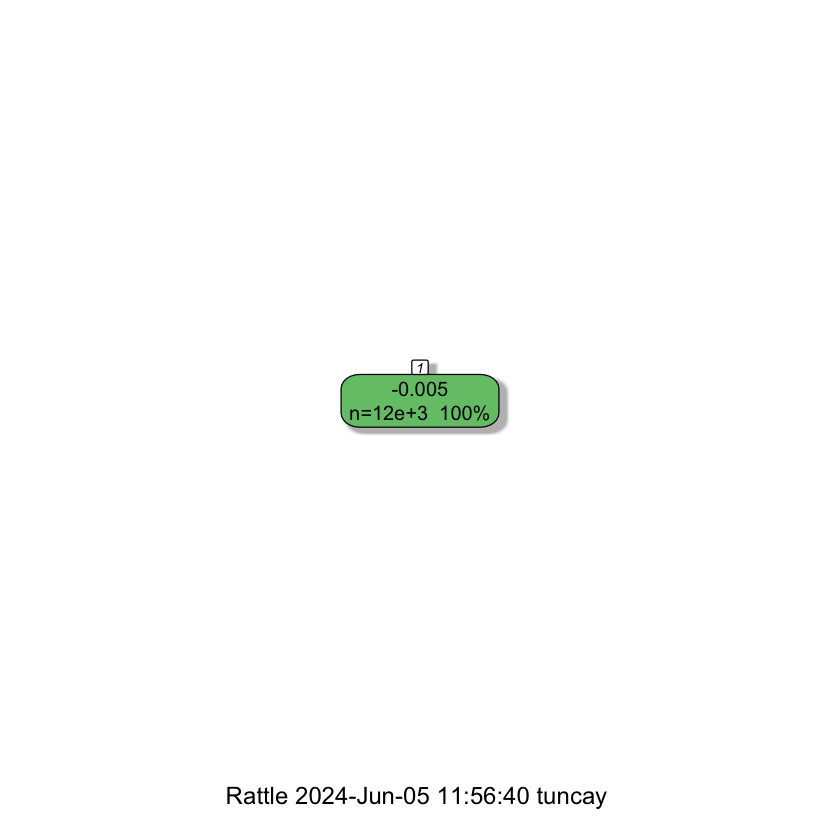

In [65]:
###RUN DECISION TREE ANALYSIS
model <- rpart(
  residual_hourly_once ~ dswrf_surface + tcdc_low + tcdc_entire + tmp_surface + hour + mon +lag_48 + csnow,
  data = tmp_hourly_once,
  method = "anova"
)
fancyRpartPlot(model)

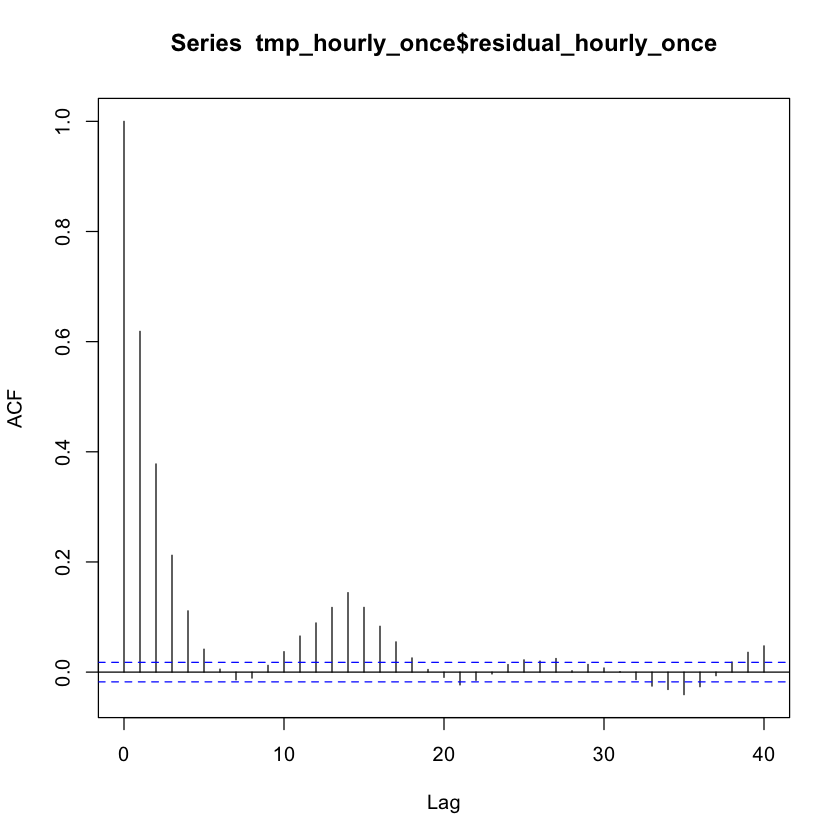

In [66]:
###PLOT ACF FOR RESIDUALS OF HOURLY PREDICTIONS ONLY
acf(tmp_hourly_once$residual_hourly_once)

### b-) Linear Regression Model for Each Hour
We create linear regression model for each hour of the day using a combination of weather variables along with time-related features to predict hourly production.

In [67]:
###CREATING HOURLY DATA TABLES FOR LATER USE IN LINEER REGRESSION
hourly_data_tables <- vector("list", 24)
# Loop through each hour and subset the data.table
for (hour_ in 0:23) {
    hourly_data_tables[[hour_ + 1]] <- final_data_[hour == hour_, ]
}

In [68]:
###FITTING LINEER REGRESSION MODEL FOR EACH HOUR OF THE DAY SEPERATELY
tmp_hourly_each=copy(final_data)
tmp_hourly_each[,actual_hourly:=production]

hourly_lm_models <- vector("list", 24)

for (hour_ in  setdiff(0:23, zero_hours)) {
    
    lm_hourly <- lm(production ~ (dswrf_surface + tcdc_low + tcdc_entire + tmp_surface + mon + lag_48 + csnow)^2 + poly(lag_48,2), data = hourly_data_tables[[hour_+1]])
    
    hourly_lm_models[[hour_+1]] <- lm_hourly
    
    tmp_hourly_each[hour == hour_, predicted_hourly_each := predict(lm_hourly, .SD)]
    
}

FOR THE SAKE OF CLARITY HERE ARE THE NAMINGS FOR EACH VARIABLE AND THEIR CORRESPONDING MODEL:
* predicted_hourly_each: prediction values by using hourly lineer regression model trained for each hour.
* combined_hourly_forecast_each: prediction values by using daily lineer regression model and ratios of predicted_hourly_each values within a day.

In [69]:
### MAKE PREDICTIONS AND STORE THE RATIOS
tmp_hourly_each[, predicted_hourly_each := pmax(predicted_hourly_each, 0)]
tmp_hourly_each[,residual_hourly_each:=actual_hourly-predicted_hourly_each]
tmp_hourly_each[, predicted_hourly_each_daily_sum := sum(predicted_hourly_each), by = date]
tmp_hourly_each[, hourly_ratio_each := predicted_hourly_each / predicted_hourly_each_daily_sum]
tmp_hourly_each[, c("dswrf_surface", "tcdc_low", "tcdc_middle", "tcdc_high", "tcdc_entire", "uswrf_atm", "csnow", "dlwrf_surface", "uswrf_surface", "tmp_surface", "production", "actual_hourly", "mon", "datetime", "lag_48") := NULL]

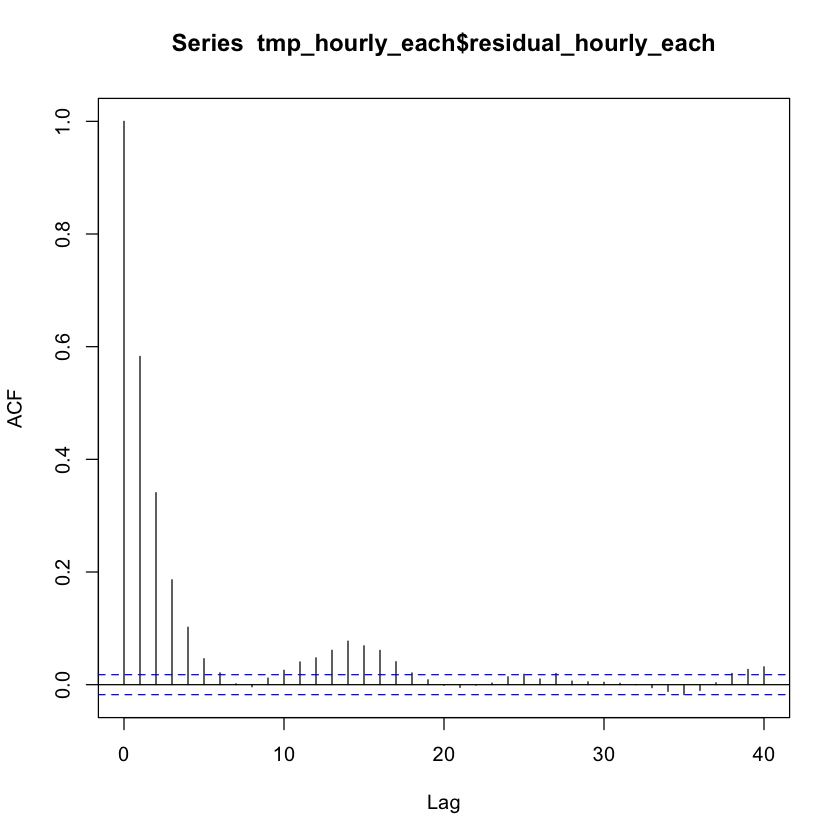

In [72]:
###PLOT ACF FOR RESIDUALS OF HOURLY PREDICTIONS ONLY
acf(tmp_hourly_each$residual_hourly_each)

We store residuals from both hourly regression models for further analysis.

In [73]:
###MAKE PREDICTIONS USING COMBINATION OF DAILY LINEER REGRESSION MODEL AND BOTH HOURLY LINEER REGRESSION MODELS
tmp_final_pre <- merge(tmp_daily, tmp_hourly_once, by = "date", all.x = TRUE)
tmp_final <- merge(tmp_final_pre, tmp_hourly_each, by = c("date","hour"), all.x = TRUE)
tmp_final[,predicted_hourly_from_daily_once:=hourly_ratio_once*predicted_daily]
tmp_final[,residual_hourly_from_daily_once:=actual_hourly-predicted_hourly_from_daily_once]
tmp_final[,predicted_hourly_from_daily_each:=hourly_ratio_each*predicted_daily]
tmp_final[,residual_hourly_from_daily_each:=actual_hourly-predicted_hourly_from_daily_each]

Now we will plot a few time intervals to analyze and see whether or not the model predictions are accurate or not visually.

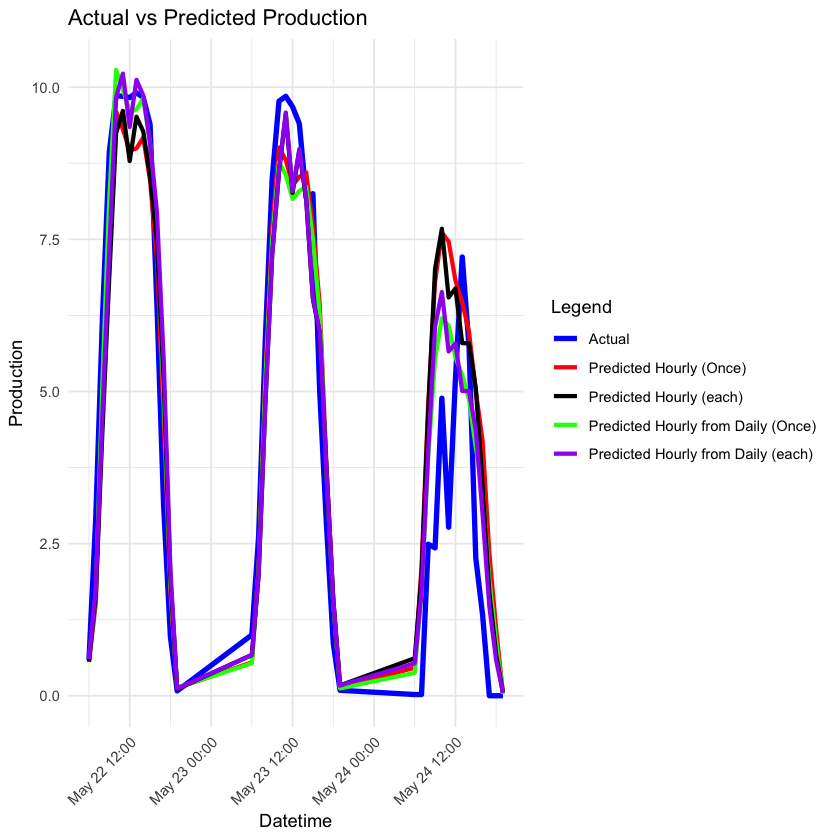

In [74]:
###PLOT THE RESULTS FOR SPECIFIC TIME INTERVALS
start_time <- as.POSIXct("2024-05-22 00:00:00")
end_time <- as.POSIXct("2024-05-24 23:59:59")

ggplot(tmp_final[tmp_final$datetime >= start_time & tmp_final$datetime <= end_time, ], aes(x = datetime)) + 
  geom_line(aes(y = actual_hourly, color = "Actual"), size = 1.5) +
  geom_line(aes(y = predicted_hourly_once, color = "Predicted Hourly (Once)"), size = 1.2) +
  geom_line(aes(y = predicted_hourly_from_daily_once, color = "Predicted Hourly from Daily (Once)"), size = 1.2) +
  geom_line(aes(y = predicted_hourly_each, color = "Predicted Hourly (each)"), size = 1.2) +
  geom_line(aes(y = predicted_hourly_from_daily_each, color = "Predicted Hourly from Daily (each)"), size = 1.2) +
  scale_color_manual(values = c("Actual" = "blue","Predicted Hourly (Once)" = "red", "Predicted Hourly from Daily (Once)" = "green", "Predicted Hourly (each)" = "black", "Predicted Hourly from Daily (each)" = "purple")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Actual vs Predicted Production",
       x = "Datetime",
       y = "Production",
       color = "Legend")

### c-) Evaluation For Hourly Production Forecasting

We will evaluate the models based on their FBias, RMSE, and WMAPE. Also, we will apply K-Fold cross validation. First, we define functions to do that.

In [75]:
###ACCURACY FUNCTION
accu=function(actual,forecast){
  n=length(actual)
  error=actual-forecast
  mean=mean(actual)
  sd=sd(actual)
  CV=sd/mean
  FBias=sum(error)/sum(actual)
  RMSE=sqrt(sum(error^2)/n)
  WMAPE=sum(abs(error))/n/mean
  l=data.frame(n,mean,sd,CV,FBias,RMSE,WMAPE)
  return(l)
}

This function implements k-fold cross-validation for linear regression models. It starts by aggregating hourly data into daily averages and initializes lists to store results and accuracies. In each fold, it divides the data into training and testing sets, fits linear regression models to both daily and hourly data, generates predictions, determines hourly predictions based on daily forecasts and hourly ratios, and calculates evaluation metrics. Average accuracies across folds are then computed and summarized in a table, which includes model names, sample sizes, root mean square error, and weighted mean absolute percentage error for both training and testing sets.

FOR THE SAKE OF CLARITY HERE ARE THE NAMINGS FOR EACH VARIABLE AND THEIR CORRESPONDING MODEL:
* predicted_hourly_once: prediction values by using hourly lineer regression model trained for whole hourly data.
* predicted_hourly_each: prediction values by using hourly lineer regression model trained for each hour.
* combined_hourly_forecast_once: prediction values by using daily lineer regression model and ratios of predicted_hourly_once values within a day.
* combined_hourly_forecast_each: prediction values by using daily lineer regression model and ratios of predicted_hourly_each values within a day.

In [76]:
###EVALUATION FUNCTION
forecast_with_daily_to_hourly_lr_cv <- function(fmla_daily, fmla_hourly_once, fmla_hourly_each, hourly_data, k = 5) {
    
    ###CREATE DAILY DATA FROM HOURLY DATA
    daily_data <- hourly_data[, .(
        avg_dswrf_surface = mean(dswrf_surface),
        avg_tcdc_low = mean(tcdc_low),
        avg_tcdc_middle = mean(tcdc_middle),
        avg_tcdc_high = mean(tcdc_high),
        avg_tcdc_entire = mean(tcdc_entire),
        avg_uswrf_atm = mean(uswrf_atm),
        avg_csnow = mean(csnow),
        avg_dlwrf_surface = mean(dlwrf_surface),
        avg_uswrf_surface = mean(uswrf_surface),
        avg_tmp_surface = mean(tmp_surface),
        mon = unique(mon),
        production_daily = sum(production)
    ), by = date]
    
    ###CREATE ARRAYS AND VECTORS TO STORE THE RESULTS AND ACCURACIES FOR EACH COMBINATION OF MODELS
    all_test_results <- list()
    all_train_results <- list()
    test_accuracies_1 <- vector("list", k)
    train_accuracies_1 <- vector("list", k)
    test_accuracies_2 <- vector("list", k)
    train_accuracies_2 <- vector("list", k)
    test_accuracies_3 <- vector("list", k)
    train_accuracies_3 <- vector("list", k)
    test_accuracies_4 <- vector("list", k)
    train_accuracies_4 <- vector("list", k)
    
    ###ASSIGN A SEED FOR CONVENIENCY
    set.seed(11)
    
    ###CREATE FOLDS 
    folds <- createFolds(daily_data$date, k = k, list = TRUE, returnTrain = FALSE)
    
    ###RUN THE EVALUATION FOR EACH FOLD
    for (i in seq_len(k)) {
        
        ###DETERMINE THE TEST AND TRAIN INDICES AND CREATE TEST AND TRAIN DATA
        test_indices <- folds[[i]]
        train_indices <- setdiff(seq_len(nrow(daily_data)), test_indices)
        
        train_daily_data <- daily_data[train_indices, ]
        test_daily_data <- daily_data[test_indices, ]
        
        train_dates <- train_daily_data$date
        test_dates <- test_daily_data$date
        
        ###CREATE HOURLY TEST AND TRAIN DATA
        train_hourly_data <- hourly_data[date %in% train_dates]
        test_hourly_data <- hourly_data[date %in% test_dates]
        
        ###CREATE HOURLY DATA FOR EACH HOUR OF THE DAY
        train_hourly_data_tables <- vector("list", 24)
        test_hourly_data_tables <- vector("list", 24)
    
        for (hour_ in 0:23) {
            train_hourly_data_tables[[hour_ + 1]] <- train_hourly_data[hour == hour_, ]
            test_hourly_data_tables[[hour_ + 1]] <- test_hourly_data[hour == hour_, ]
        }
        
        ###FIT A LINEER REGRESSION MODEL FOR DAILY PRODUCTION PREDICTION USING GIVEN FORMULA
        lm_daily <- lm(as.formula(fmla_daily), data = train_daily_data)
        train_forecast_daily <- predict(lm_daily, train_daily_data)
        
        ###FIT A LINEER REGRESSION MODEL FOR HOURLY PRODUCTION PREDICTION USING GIVEN FORMULA
        lm_hourly_once <- lm(as.formula(fmla_hourly_once), data = train_hourly_data)
        
        ###MAKE PREDICTIONS FOR HOURLY LINEER MODEL AND DETERMINE THE RATIOS
        ###ADJUST <0, >10 VALUES TO 0,10
        train_hourly_data[, predicted_hourly_once := predict(lm_hourly_once, train_hourly_data)]
        train_hourly_data[, predicted_hourly_once := pmax(predicted_hourly_once, 0)]
        train_hourly_data[, predicted_hourly_once := pmin(predicted_hourly_once, 10)]
        train_hourly_data[, total_hourly_prediction_for_day_once := sum(predicted_hourly_once), by = date]
        train_hourly_data[, hourly_ratio_once := predicted_hourly_once / total_hourly_prediction_for_day_once]
        
        ###FIT A LINEER REGRESSION MODEL HOURLY PRODUCTION PREDICTION FOR EACH HOUR OF A DAY USING GIVEN FORMULA
        hourly_lm_models <- vector("list", 24)

        for (hour_ in  setdiff(0:23, zero_hours)) {
            
            lm_hourly <- lm(as.formula(fmla_hourly_each), data = train_hourly_data_tables[[hour_+1]])
            
            hourly_lm_models[[hour_+1]] <- lm_hourly
            
            train_hourly_data[hour == hour_, predicted_hourly_each := predict(lm_hourly, .SD)]
            
        }
        
        ###MAKE PREDICTIONS FOR HOURLY LINEER MODEL AND DETERMINE THE RATIOS
        ###ADJUST <0, >10 VALUES TO 0,10
        train_hourly_data[, predicted_hourly_each := pmax(predicted_hourly_each, 0)]
        train_hourly_data[, predicted_hourly_each := pmin(predicted_hourly_each, 10)]
        train_hourly_data[, total_hourly_prediction_for_day_each := sum(predicted_hourly_each), by = date]
        train_hourly_data[, hourly_ratio_each := predicted_hourly_each / total_hourly_prediction_for_day_each]
        
        ###COMBINE DAILY PREDICTIONS AND HOURLY PREDICTIONS FOR BOTH MODELS AND STORE THE RESULTS
        train_daily_forecast_df <- data.table(date = train_daily_data$date, forecast_daily = train_forecast_daily)
        train_hourly_data <- merge(train_hourly_data, train_daily_forecast_df, by = "date", all.x = TRUE)
        train_hourly_data[, combined_hourly_forecast_once := hourly_ratio_once * forecast_daily]
        train_hourly_data[, combined_hourly_forecast_each := hourly_ratio_each * forecast_daily]
        
        ###CALCULATE ACCURACIES
        train_hourly_accuracy_1 <- accu(train_hourly_data$production, train_hourly_data$predicted_hourly_once)
        train_hourly_accuracy_2 <- accu(train_hourly_data$production, train_hourly_data$combined_hourly_forecast_once)
        train_hourly_accuracy_3 <- accu(train_hourly_data$production, train_hourly_data$predicted_hourly_each)
        train_hourly_accuracy_4 <- accu(train_hourly_data$production, train_hourly_data$combined_hourly_forecast_each)

        ###DO ALL THE STEPS FOR TEST DATA ALSO
        test_forecast_daily <- predict(lm_daily, test_daily_data)
        
        test_hourly_data[, predicted_hourly_once := predict(lm_hourly_once, test_hourly_data)]
        test_hourly_data[, predicted_hourly_once := pmax(predicted_hourly_once, 0)]
        test_hourly_data[, predicted_hourly_once := pmin(predicted_hourly_once, 10)]
        test_hourly_data[, total_hourly_prediction_for_day_once := sum(predicted_hourly_once), by = date]
        test_hourly_data[, hourly_ratio_once := predicted_hourly_once / total_hourly_prediction_for_day_once]
        
        
        for (hour_ in  setdiff(0:23, zero_hours)) {
            
            test_hourly_data[hour == hour_, predicted_hourly_each := predict(hourly_lm_models[[hour_+1]], .SD)]
            
        }
        
        test_hourly_data[, predicted_hourly_each := pmax(predicted_hourly_each, 0)]
        test_hourly_data[, predicted_hourly_each := pmin(predicted_hourly_each, 10)]
        test_hourly_data[, total_hourly_prediction_for_day_each := sum(predicted_hourly_each), by = date]
        test_hourly_data[, hourly_ratio_each := predicted_hourly_each / total_hourly_prediction_for_day_each]
        
        test_daily_forecast_df <- data.table(date = test_daily_data$date, forecast_daily = test_forecast_daily)
        test_hourly_data <- merge(test_hourly_data, test_daily_forecast_df, by = "date", all.x = TRUE)
        test_hourly_data[, combined_hourly_forecast_once := hourly_ratio_once * forecast_daily]
        test_hourly_data[, combined_hourly_forecast_each := hourly_ratio_each * forecast_daily]
        
        
        test_hourly_accuracy_1 <- accu(test_hourly_data$production, test_hourly_data$predicted_hourly_once)
        test_hourly_accuracy_2 <- accu(test_hourly_data$production, test_hourly_data$combined_hourly_forecast_once)
        test_hourly_accuracy_3 <- accu(test_hourly_data$production, test_hourly_data$predicted_hourly_each)
        test_hourly_accuracy_4 <- accu(test_hourly_data$production, test_hourly_data$combined_hourly_forecast_each)
        
        ###STORE ALL RESULTS AND PREDICTIONS FOR EACH MODEL COMBINATION
        all_train_results[[i]] <- train_hourly_data
        all_test_results[[i]] <- test_hourly_data
        train_accuracies_1[[i]] <- train_hourly_accuracy_1
        test_accuracies_1[[i]] <- test_hourly_accuracy_1
        train_accuracies_2[[i]] <- train_hourly_accuracy_2
        test_accuracies_2[[i]] <- test_hourly_accuracy_2
        train_accuracies_3[[i]] <- train_hourly_accuracy_3
        test_accuracies_3[[i]] <- test_hourly_accuracy_3
        train_accuracies_4[[i]] <- train_hourly_accuracy_4
        test_accuracies_4[[i]] <- test_hourly_accuracy_4
    }
    
    ###TAKE THE MEAN OF ACCURACIES IN EACH FOLD BOT FOR TRAIN AND TEST DATA SEPERATELY
    mean_accuracy <- function(accuracies) {
        mean_df <- do.call(rbind, accuracies)
        return(colMeans(mean_df, na.rm = TRUE))
    }
    
    avg_train_accuracy_1 <- mean_accuracy(train_accuracies_1)
    avg_test_accuracy_1 <- mean_accuracy(test_accuracies_1)
    avg_train_accuracy_2 <- mean_accuracy(train_accuracies_2)
    avg_test_accuracy_2 <- mean_accuracy(test_accuracies_2)
    avg_train_accuracy_3 <- mean_accuracy(train_accuracies_3)
    avg_test_accuracy_3 <- mean_accuracy(test_accuracies_3)
    avg_train_accuracy_4 <- mean_accuracy(train_accuracies_4)
    avg_test_accuracy_4 <- mean_accuracy(test_accuracies_4)
    
    ###STORE THE ACCURACY RESULTS IN THE TABLE
    accuracy_summary <- data.table(
        Model = c("lm_hourly_once (Train)", "lm_hourly_once (Test)", "lm_daily_to_hourly_once (Train)", "lm_daily_to_hourly_once (Test)", "lm_hourly_each (Train)", "lm_hourly_each (Test)", "lm_daily_to_hourly_each (Train)", "lm_daily_to_hourly_each (Test)"),
        N = c(avg_train_accuracy_1["n"], avg_test_accuracy_1["n"], avg_train_accuracy_2["n"], avg_test_accuracy_2["n"], avg_train_accuracy_3["n"], avg_test_accuracy_3["n"], avg_train_accuracy_4["n"], avg_test_accuracy_4["n"]),
        RMSE = c(avg_train_accuracy_1["RMSE"], avg_test_accuracy_1["RMSE"], avg_train_accuracy_2["RMSE"], avg_test_accuracy_2["RMSE"], avg_train_accuracy_3["RMSE"], avg_test_accuracy_3["RMSE"], avg_train_accuracy_4["RMSE"], avg_test_accuracy_4["RMSE"]),
        WMAPE = c(avg_train_accuracy_1["WMAPE"], avg_test_accuracy_1["WMAPE"], avg_train_accuracy_2["WMAPE"], avg_test_accuracy_2["WMAPE"], avg_train_accuracy_3["WMAPE"], avg_test_accuracy_3["WMAPE"], avg_train_accuracy_4["WMAPE"], avg_test_accuracy_4["WMAPE"])
    )
    
    ###RETURN THE RESULTS
    return(list(
        all_train_results = all_train_results,
        all_test_results = all_test_results,
        accuracy_summary = accuracy_summary
    ))
}

Now we will conduct cross-validated linear regression modeling for both daily and hourly production forecasting, assessing model performance through various accuracy metrics. This formulas for lineer regression models are changed iteratively to reach the minimum wmape test scores. The results provide insights into the effectiveness of different modeling approaches for predicting production.

In [137]:
###FORMULAS FOR LINEER REGRESSION MODELS
options(warn = -1)
fmla_daily <- "production_daily ~ avg_dswrf_surface + avg_tmp_surface + avg_tcdc_entire + avg_tcdc_low + avg_csnow + mon + avg_tcdc_low*mon + avg_dswrf_surface*avg_tcdc_low + avg_tmp_surface*avg_tcdc_entire + avg_tmp_surface*avg_dswrf_surface + avg_csnow*avg_dswrf_surface + avg_dswrf_surface*mon + avg_tmp_surface*mon + avg_tcdc_entire*mon + avg_dswrf_surface*avg_tcdc_entire*mon"
fmla_hourly_once <- "production ~ dswrf_surface + tcdc_low + tcdc_entire + tmp_surface + hour + mon +lag_48 + csnow + dswrf_surface * hour + tcdc_low * hour + tcdc_entire * hour + hour * tmp_surface + lag_48 * hour + tmp_surface * dswrf_surface + csnow * hour + hour * mon * tcdc_low"
fmla_hourly_each <- "production ~ (dswrf_surface + tcdc_low + tcdc_entire + tmp_surface + mon + lag_48 + csnow)^2 + poly(lag_48,2)"
results <- forecast_with_daily_to_hourly_lr_cv(fmla_daily, fmla_hourly_once, fmla_hourly_each,final_data)

results$accuracy_summary

Model                           N      RMSE     WMAPE    
1 lm_hourly_once (Train)          9774.4 1.616128 0.2345264
2 lm_hourly_once (Test)           2443.6 1.704588 0.2459349
3 lm_daily_to_hourly_once (Train) 9774.4 1.515308 0.2189943
4 lm_daily_to_hourly_once (Test)  2443.6 1.659043 0.2368626
5 lm_hourly_each (Train)          9774.4 1.455434 0.2075909
6 lm_hourly_each (Test)           2443.6 1.747297 0.2455973
7 lm_daily_to_hourly_each (Train) 9774.4 1.441088 0.2047043
8 lm_daily_to_hourly_each (Test)  2443.6 1.713027 0.2401877

# 4-) PREDICTION
Now that our functions and models are ready, we will create a prediction function that creates predictions with our linear models for the next day.

This function initially forecasts daily production by utilizing the `lm_daily` model and predicts hourly production with the `lm_hourly_once` model. Subsequently, it iterates through each hour of the day, projecting hourly production using the respective model from `lm_hourly_models` and computes hourly ratios. Following this, it aggregates the daily predictions and adjusts the hourly forecasts based on both the daily predictions and the hourly ratios. Ultimately, the function returns a subset of the projected hourly data, including date, hour, lag_48, predicted_hourly_once, combined_hourly_forecast_once, predicted_hourly_each, and combined_hourly_forecast_each.

In [138]:
###PREDICTION FUNCTION FOR UNSEEN DATA
###RESULTS OF EACH MODEL COMBINATION IS RETURNED FOR UNSEEN DATA
live_daily_to_hourly_prediction <- function(lm_daily, lm_hourly_once, lm_hourly_models, new_daily_data, new_hourly_data_tables, new_hourly_data) {

    predicted_daily <- predict(lm_daily, new_daily_data)
    predicted_daily <- as.numeric(predicted_daily)  
    
    predicted_hourly_once <- predict(lm_hourly_once, new_hourly_data)
    predicted_hourly_once <- pmax(predicted_hourly_once, 0) 
    
    new_hourly_data[, predicted_hourly_once := predicted_hourly_once]
    
    for (hour_ in  setdiff(0:23, zero_hours)) {
    
    lm_hourly_each <- lm_hourly_models[[hour_+1]]
    
    new_hourly_data[hour == hour_, predicted_hourly_each := predict(lm_hourly_each, .SD)]
    
    }
    
    new_hourly_data[, total_hourly_prediction_for_day_once := sum(predicted_hourly_once), by = date]

    new_hourly_data[, hourly_ratio_once := predicted_hourly_once / total_hourly_prediction_for_day_once]
    
    
    new_hourly_data[, total_hourly_prediction_for_day_each := sum(predicted_hourly_each), by = date]

    new_hourly_data[, hourly_ratio_each := predicted_hourly_each / total_hourly_prediction_for_day_each]
    

    new_daily_forecast_df <- data.table(date = new_daily_data$date, forecast_daily = predicted_daily)
    new_hourly_data <- merge(new_hourly_data, new_daily_forecast_df, by = "date", all.x = TRUE)

    new_hourly_data[, combined_hourly_forecast_once := hourly_ratio_once * forecast_daily]

    new_hourly_data[, combined_hourly_forecast_once := pmax(combined_hourly_forecast_once, 0)]
    new_hourly_data[, combined_hourly_forecast_once := pmin(combined_hourly_forecast_once, 10)]
    
    new_hourly_data[, combined_hourly_forecast_each := hourly_ratio_each * forecast_daily]

    new_hourly_data[, combined_hourly_forecast_each := pmax(combined_hourly_forecast_each, 0)]
    new_hourly_data[, combined_hourly_forecast_each := pmin(combined_hourly_forecast_each, 10)]

    return(new_hourly_data[, .(date, hour, lag_48, predicted_hourly_once,combined_hourly_forecast_once, predicted_hourly_each,combined_hourly_forecast_each)])
}

Now we prepare data for forecasting the next day's production. The following code collects weather data for the prediction date, aggregates it to hourly averages, and merges it with historical production data from two days prior.

In [139]:
###PREDICTION DATE
prediction_date <- as.Date("2024-05-26")

###PREPROCESSING OF UNSEEN DATA
weather_on_prediction_date <- weather_data[date == prediction_date]

aggregated_data_prediction_date <- weather_on_prediction_date[, .(
  dswrf_surface = mean(dswrf_surface),
  uswrf_atm = mean(uswrf_atm),
  uswrf_surface = mean(uswrf_surface),
  dlwrf_surface = mean(dlwrf_surface),
  tmp_surface = mean(tmp_surface),
  tcdc_low = mean(tcdc_low),
  tcdc_middle = mean(tcdc_middle),
  tcdc_high = mean(tcdc_high),
  tcdc_entire = mean(tcdc_entire),
  csnow = max(csnow)    
), by = .(date,hour)]

final_weather_data_prediction_date <- aggregated_data_prediction_date

lag_48_date <- prediction_date - 2
production_on_lag_48_date <- prod_data[date == lag_48_date]

production_subset <- production_on_lag_48_date[, c("hour", "production")]

final_data_prediction_date <- merge(
    final_weather_data_prediction_date,
    production_subset,
    by = "hour",
    all.x = TRUE
)

setnames(final_data_prediction_date, "production", "lag_48")
final_data_prediction_date <- final_data_prediction_date[!(hour %in% zero_hours)]
final_data_prediction_date[,mon:=as.character(month(date,label=T))]
final_data_prediction_date[, hour := factor(hour)]

hourly_data_tables_prediction_date <- vector("list", 24)

for (hour_ in 0:23) {
    hourly_data_tables_prediction_date[[hour_ + 1]] <- final_data_prediction_date[hour == hour_, ]
}

daily_data_prediction_date <- final_data_prediction_date[, .(
  avg_dswrf_surface = mean(dswrf_surface),
  avg_tcdc_low = mean(tcdc_low),
  avg_tcdc_middle = mean(tcdc_middle),
  avg_tcdc_high = mean(tcdc_high),
  avg_tcdc_entire = mean(tcdc_entire),
  avg_uswrf_atm = mean(uswrf_atm),
  avg_csnow = mean(csnow),
  avg_dlwrf_surface = mean(dlwrf_surface),
  avg_uswrf_surface = mean(uswrf_surface),
  avg_tmp_surface = mean(tmp_surface),
  mon = unique(mon),
  lag48 = sum(lag_48)
), by = date]

We can get the predictions for the following day using pre-defined functions.

In [140]:
###PREDICTION RESULTS OF UNSEEN DATA
prediction_results <- live_daily_to_hourly_prediction(lm_daily, lm_hourly_once,hourly_lm_models, daily_data_prediction_date, hourly_data_tables_prediction_date, final_data_prediction_date)

In [141]:
### PREDICTION METRICS FOR FOUR COMBINATIONS OF LINEER REGRESSION MODELS
prediction_metrics_once <- accu(final_data[date==prediction_date]$production,prediction_results$predicted_hourly_once)
prediction_metrics_daily_to_hourly_once <- accu(final_data[date==prediction_date]$production[1:11],prediction_results$combined_hourly_forecast_once[1:11])
prediction_metrics_each <- accu(final_data[date==prediction_date]$production,prediction_results$predicted_hourly_each)
prediction_metrics_daily_to_hourly_each <- accu(final_data[date==prediction_date]$production,prediction_results$combined_hourly_forecast_each)

# 5-) RESULTS

Let's plot our finding for our alternative daily production models.

In [146]:
performance

variable       n   mean     sd       CV        FBias      MAPE RMSE    
1 arima_forecast 173 54.05376 22.78965 0.4216108 0.02578356 Inf  20.88914
2 lm_forecast    175 53.96703 22.76068 0.4217515 0.03053821 Inf  12.24549
  MAD       MADP      WMAPE    
1 17.910345 0.3313432 0.3313432
2  9.024123 0.1672155 0.1672155

As we can see from the scores, for daily production prediction we have lower WMAPE scores for lineer regression model. FBias for Arima Forecast can be explained by the nonexisting seasonal information to the model as well. Due to lower WMAPE scores of lineer regression model, it is preffered for daily production prediction.

Let's also show the performance and evaluation metrics for hourly production prediction models.

In [143]:
results$accuracy_summary

Model                           N      RMSE     WMAPE    
1 lm_hourly_once (Train)          9774.4 1.616128 0.2345264
2 lm_hourly_once (Test)           2443.6 1.704588 0.2459349
3 lm_daily_to_hourly_once (Train) 9774.4 1.515308 0.2189943
4 lm_daily_to_hourly_once (Test)  2443.6 1.659043 0.2368626
5 lm_hourly_each (Train)          9774.4 1.455434 0.2075909
6 lm_hourly_each (Test)           2443.6 1.747297 0.2455973
7 lm_daily_to_hourly_each (Train) 9774.4 1.441088 0.2047043
8 lm_daily_to_hourly_each (Test)  2443.6 1.713027 0.2401877

After lots of model and predictor adjustments we decided to continue with lm_daily_to_hourly_once method. We predicted sum of daily production with lineer regression and distributed this sum into hours by using another lineer regression model for hourly prediction. This hourly prediction model is trained with whole hourly production data with independen predictors and seasonality terms. The reason we choose this model is that it gives lowest test accuracy with a little bit overfitting. 

Our WMAPE scores for each day of the competition phase is shown below:

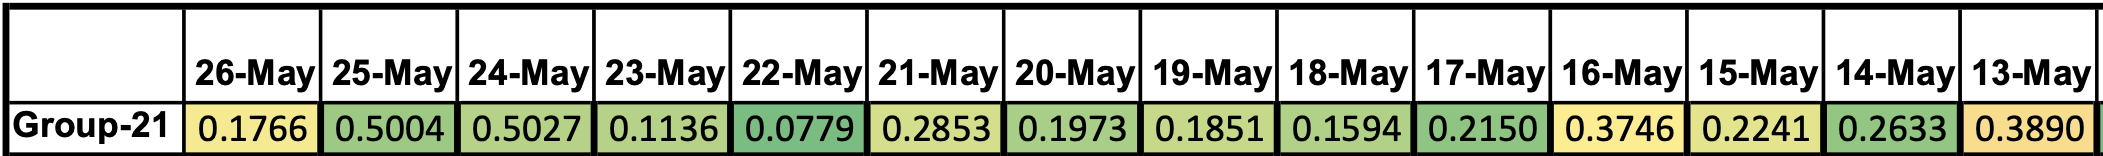

# 6-) CONCLUSION AND FUTURE WORK

Throughout this project, our primary aim was to forecast the hourly solar energy production of Edikli GES in Niğde, Turkey, utilizing production and weather data. We embarked on an extensive exploration, employing a range of statistical and machine learning techniques to craft and assess forecasting models.

Our investigation began with a recognition of the critical importance of solar energy production forecasting in mitigating production variability and trading risks for energy companies. Leveraging weather data from 25 surrounding grid points and hourly production records, we crafted predictive models. To have better predictive outcomes and stronger predictions, we pre-processed the data and performed some cleaning operations such as leaving the zero production hours outside of the data. In model creation process, we have tried two different approaches which were ARIMA and linear regression, and then disseminated hourly linear regression proportions to better allocate the daily production into separate hours.

Throughout our analysis, we evaluated model performance using various metrics such as FBias, RMSE, and WMAPE. Among all alternative models, the one with daily total prediction combined with hourly regression proportions was the one with the best performing model. The WMAPE evaluation value for the chosen model was 0.2368626.

Although there is a lot of deviation from the WMAPE score we found in test data we achieved a good ranking overall. During competition phase some of the data did not show up properly or they were not on time. Therefore maybe it would be better to use higher lag values instead of lag2 in lineer regression models. Also since we did not cover SARIMA models, we have not tried that. It can also be chosen as an alternative model and its results can give promising WMAPE scores as well as we can also implement seasonality on that model. ARIMA models with independent variables integrated models may also give good results. 

While our models exhibited reasonable accuracy, there remains significant room for enhancement. Future endeavors may focus on refining modeling techniques, integrating additional features such as legal regulations and maintenance schedules, and exploring advanced forecasting methods to achieve better predictive accuracy and reliability in solar energy production forecasting.